# Assignment No. 2
###Lecturer: Professor Yitzhak Lapidot
###Gal Neumann - 316120260 & Nizan Ismailov - 208412569
# A Comparison of Artificial Neural Network and Decision Trees with Logistic Regression as Classification Models for Breast Cancer Survival
The data set was import from: NIH - National Cancer Institute (SEER)

### Imports

In [3]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import export_text
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split, cross_validate, cross_val_score
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from IPython.display import display

### Load the data

In [4]:
data = pd.read_csv('data.csv')
print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  concavity_worst  concave points_worst  symmetry_worst  \
0         0.2419  ...           0.7119    

# Data PreProcessing
### Taking care of missing data

In [5]:
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data.shape
data.describe()

(569, 37)

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  smoothness_worst  \
count     569.000000              569.000000  ...        569.000000   
mean        0.181162                0.062798  ...          0.132369   
std         0.027414                0.007060  ...          0.022832   
min         0.106000                0.049960  ...          0.071170   
25%         0.161900                0.057700  ...          0.116600   
50%         0.179200                0.061540  ...          0.131300   
75%         0.195700                0.066120  ...          0.146000   
max         0.304000                0.097440  ...          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst         age    duration  \
count      569.000000               569.000000  569.000000  569.000000   
mean         0.290076                 0.083946   59.641476   63.465729   
std          0.061867                 0.018061   17.749472   32.925748   
min          0.156500                 0.055040   30.000000    6.000000   
25%          0.250400                 0.071460   45.000000   34.000000   
50%          0.282200                 0.080040   60.000000   63.000000   
75%          0.317900                 0.092080   75.000000   92.000000   
max          0.663800                 0.207500   90.000000  120.000000   

           censor  survival_probability  
count  569.000000            569.000000  
mean     0.794376              0.573025  
std      0.404512              0.143626  
min      0.000000              0.204240  
25%      1.000000              0.467546  
50%      1.000000              0.576885  
75%      1.000000              0.689974  
max      1.000000              0.866458  

[8 rows x 34 columns]

As we can see there are no missing values, "SEER" datasets shoul'd be clean and without missing values.   

###Change the target (Survival_probability) to binary terms and remove "survival_probability" and "censor" from data
Acording to the article, the goal is to predict whether a patient survived or not.


"1" = Survived , "0" = Didn't Survived


In [6]:
data['target'] = (data['survival_probability'] > 0.5).astype(int)
Binary_data = data.copy()

data = data.drop('survival_probability', axis=1)
data = data.drop('censor', axis=1)
data.to_csv('data_01.csv', index=False)

data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_worst  concavity_worst  \
0         0.2419  ...             0.6656           0.7119   
1         0.1812  ...             0.1866           0.2416   
2         0.2069  ...             0.4245           0.4504   
3         0.2597  ...             0.8663           0.6869   
4         0.1809  ...             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  age  \
0                0.2654          0.4601                  0.11890   74   
1                0.1860          0.2750                  0.08902   77   
2                0.2430          0.3613                  0.08758   83   
3                0.2575          0.6638                  0.17300   30   
4                0.1625          0.2364                  0.07678   33   

   stage_of_cancer  treatment_administered  duration  target  
0          Stage 1               Radiation        20       1  
1          Stage 1                 Surgery        67       1  
2          Stage 4                Hormonal        93       1  
3          Stage 3               Radiation        38       0  
4          Stage 2                Hormonal        62       0  

[5 rows x 36 columns]

###Now we will split the data into 80% train and 20% test.
We made sure to preserve target variable distribution using Stratification Parameter.

In [7]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"Stratification of train set: {y_train.mean()}")
print(f"Stratification of test set: {y_test.mean()}")

Stratification of train set: 0.6659340659340659
Stratification of test set: 0.6666666666666666


Exports the sets

In [8]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

### Adjust the data into Categorical and Numerical datatypes

In [9]:
objectAttributesKey = ["diagnosis", "stage_of_cancer", "treatment_administered"]
integerAttributesKey = ["age"]

data[objectAttributesKey] = data[objectAttributesKey].astype('category')
data[integerAttributesKey] = data[integerAttributesKey].astype(int)

data = pd.get_dummies(data, columns=objectAttributesKey, drop_first=True)

data.to_csv('train_data_01.csv', index=False)

In [10]:
data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  duration  target  diagnosis_M  \
0                 0.07871  ...        20       1         True   
1                 0.05667  ...        67       1         True   
2                 0.05999  ...        93       1         True   
3                 0.09744  ...        38       0         True   
4                 0.05883  ...        62       0         True   

   stage_of_cancer_Stage 2  stage_of_cancer_Stage 3  stage_of_cancer_Stage 4  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                    False                     True   
3                    False                     True                    False   
4                     True                    False                    False   

   treatment_administered_Combination  treatment_administered_Hormonal  \
0                               False                            False   
1                               False                            False   
2                               False                             True   
3                               False                            False   
4                               False                             True   

   treatment_administered_Radiation  treatment_administered_Surgery  
0                              True                           False  
1                             False                            True  
2                             False                           False  
3                              True                           False  
4                             False                           False  

[5 rows x 41 columns]

We will check for the distribution of 'target'

In [11]:
train_data['target'].value_counts()

target
1    303
0    152
Name: count, dtype: int64

### Identify outliers
we'll calculate the 1.5 times the Interquartile Range (IQR) and visualize them using boxplots.

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='radius_mean'>

Text(0.5, 1.0, 'Boxplot of radius_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'radius_mean')

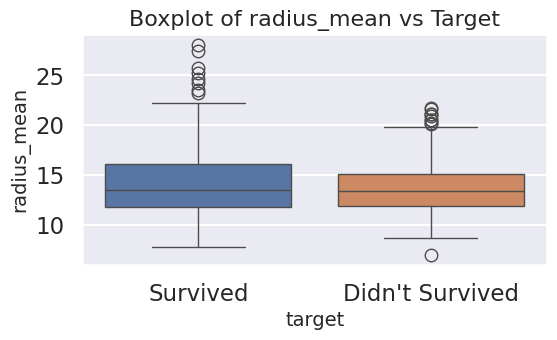

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='texture_mean'>

Text(0.5, 1.0, 'Boxplot of texture_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'texture_mean')

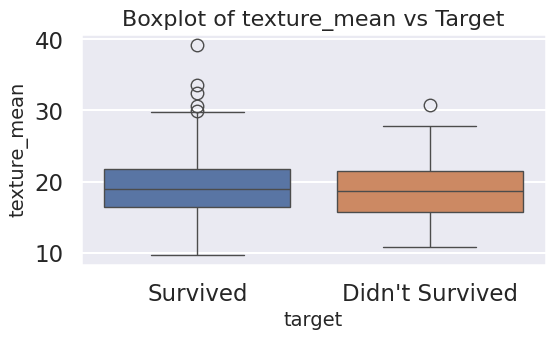

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='perimeter_mean'>

Text(0.5, 1.0, 'Boxplot of perimeter_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'perimeter_mean')

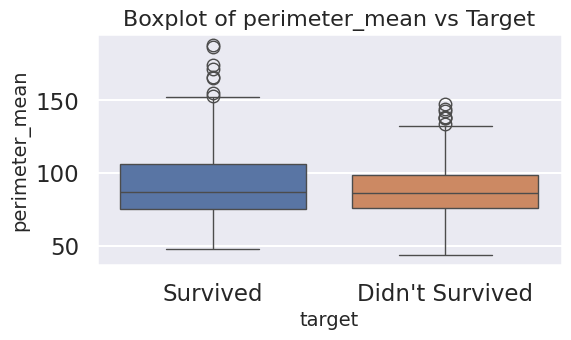

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='area_mean'>

Text(0.5, 1.0, 'Boxplot of area_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'area_mean')

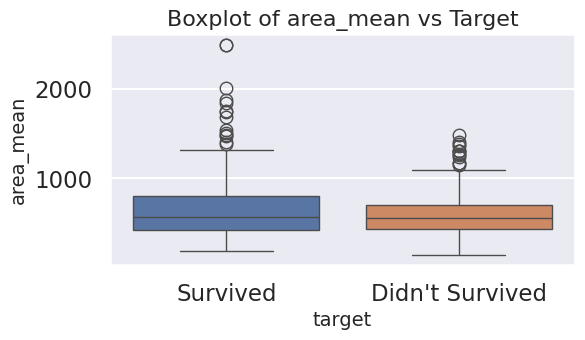

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='smoothness_mean'>

Text(0.5, 1.0, 'Boxplot of smoothness_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'smoothness_mean')

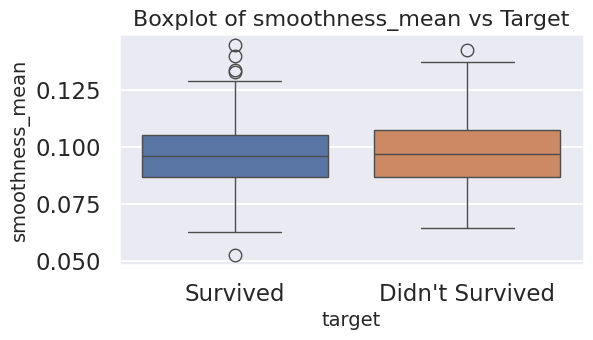

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='compactness_mean'>

Text(0.5, 1.0, 'Boxplot of compactness_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'compactness_mean')

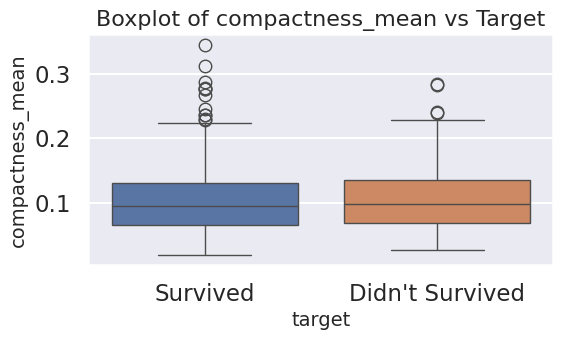

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concavity_mean'>

Text(0.5, 1.0, 'Boxplot of concavity_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concavity_mean')

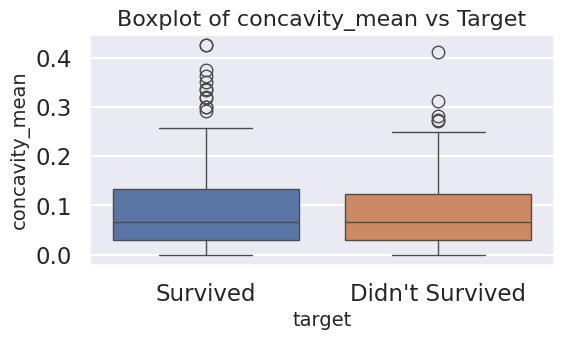

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concave points_mean'>

Text(0.5, 1.0, 'Boxplot of concave points_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concave points_mean')

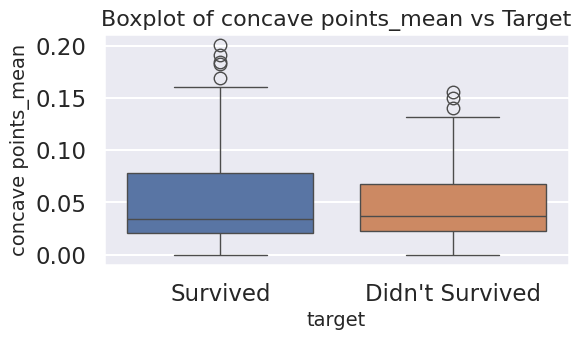

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='symmetry_mean'>

Text(0.5, 1.0, 'Boxplot of symmetry_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'symmetry_mean')

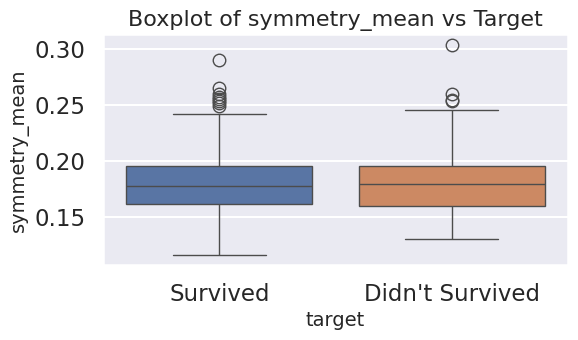

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='fractal_dimension_mean'>

Text(0.5, 1.0, 'Boxplot of fractal_dimension_mean vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'fractal_dimension_mean')

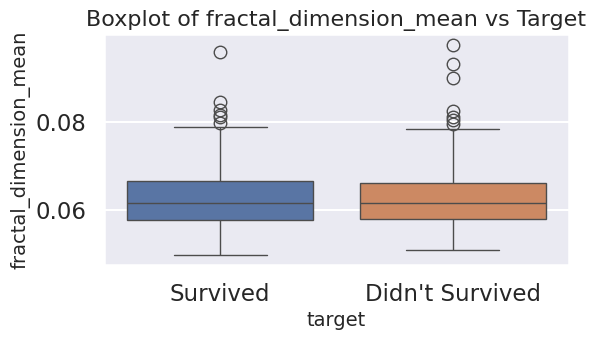

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='radius_se'>

Text(0.5, 1.0, 'Boxplot of radius_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'radius_se')

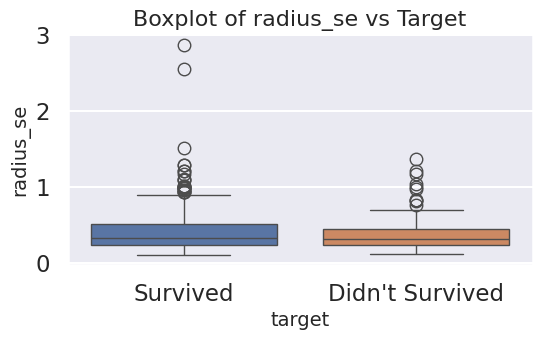

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='texture_se'>

Text(0.5, 1.0, 'Boxplot of texture_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'texture_se')

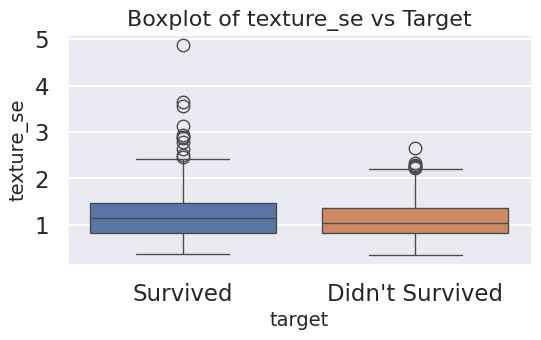

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='perimeter_se'>

Text(0.5, 1.0, 'Boxplot of perimeter_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'perimeter_se')

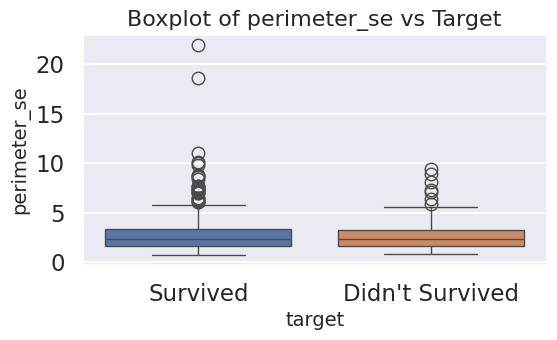

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='area_se'>

Text(0.5, 1.0, 'Boxplot of area_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'area_se')

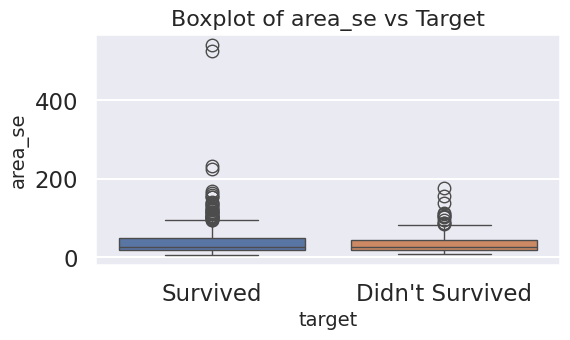

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='smoothness_se'>

Text(0.5, 1.0, 'Boxplot of smoothness_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'smoothness_se')

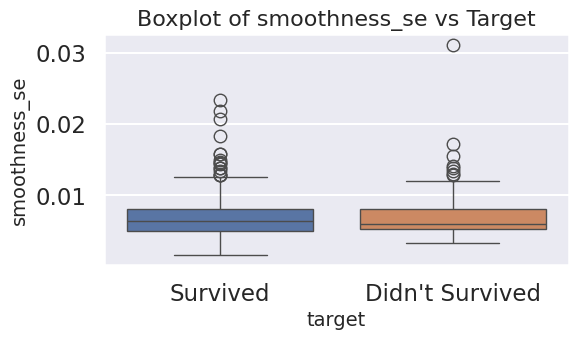

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='compactness_se'>

Text(0.5, 1.0, 'Boxplot of compactness_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'compactness_se')

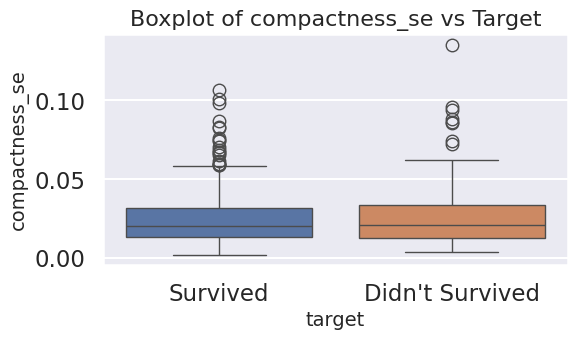

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concavity_se'>

Text(0.5, 1.0, 'Boxplot of concavity_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concavity_se')

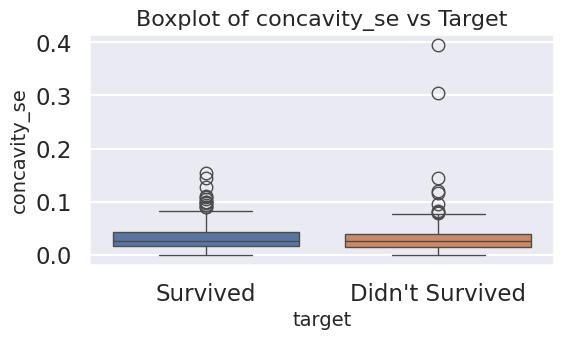

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concave points_se'>

Text(0.5, 1.0, 'Boxplot of concave points_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concave points_se')

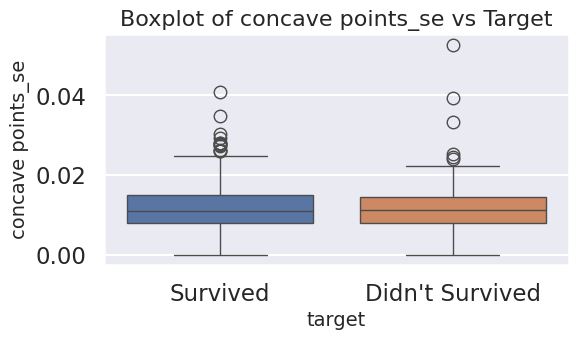

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='symmetry_se'>

Text(0.5, 1.0, 'Boxplot of symmetry_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'symmetry_se')

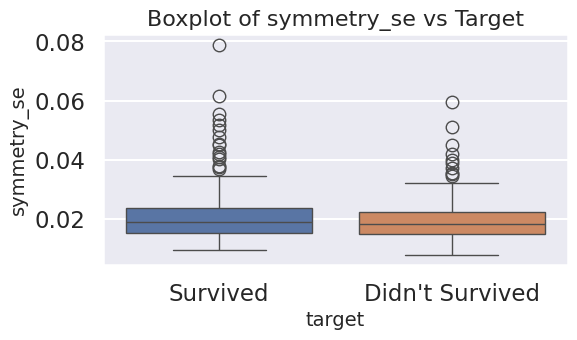

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='fractal_dimension_se'>

Text(0.5, 1.0, 'Boxplot of fractal_dimension_se vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'fractal_dimension_se')

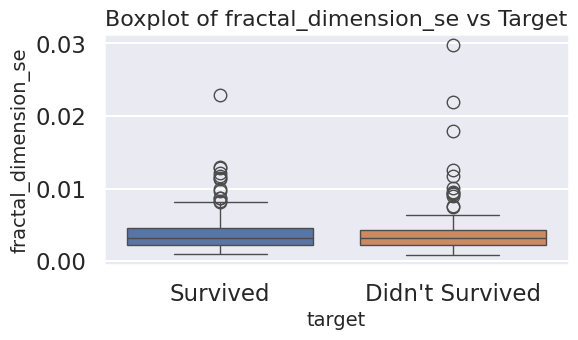

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='radius_worst'>

Text(0.5, 1.0, 'Boxplot of radius_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'radius_worst')

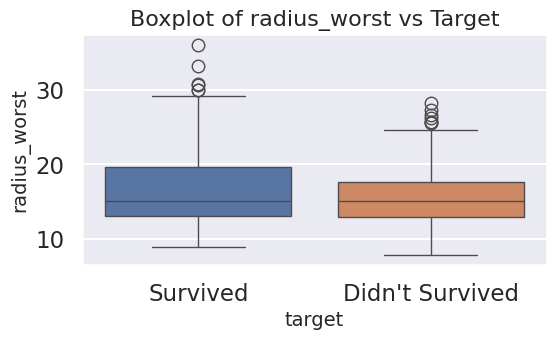

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='texture_worst'>

Text(0.5, 1.0, 'Boxplot of texture_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'texture_worst')

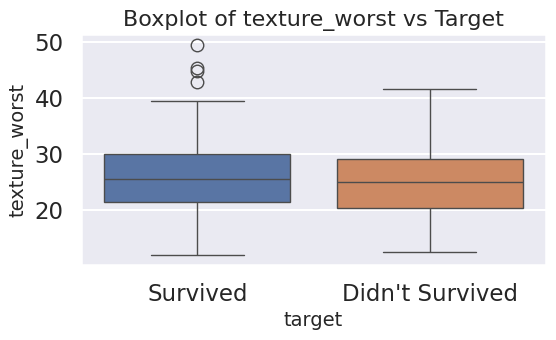

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='perimeter_worst'>

Text(0.5, 1.0, 'Boxplot of perimeter_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'perimeter_worst')

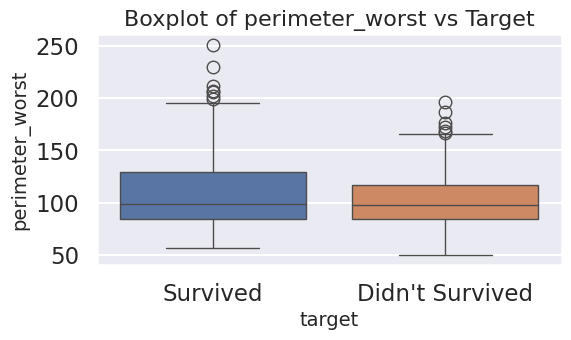

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='area_worst'>

Text(0.5, 1.0, 'Boxplot of area_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'area_worst')

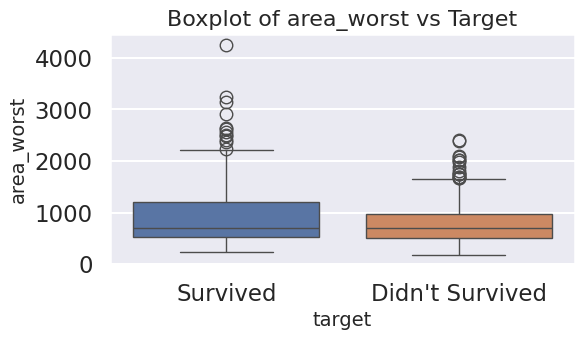

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='smoothness_worst'>

Text(0.5, 1.0, 'Boxplot of smoothness_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'smoothness_worst')

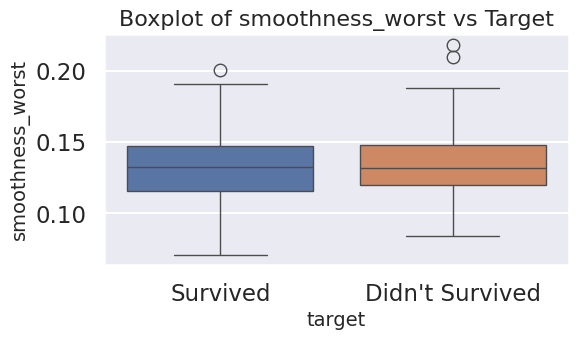

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='compactness_worst'>

Text(0.5, 1.0, 'Boxplot of compactness_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'compactness_worst')

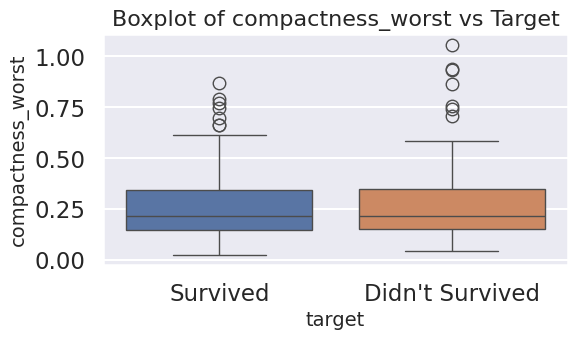

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concavity_worst'>

Text(0.5, 1.0, 'Boxplot of concavity_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concavity_worst')

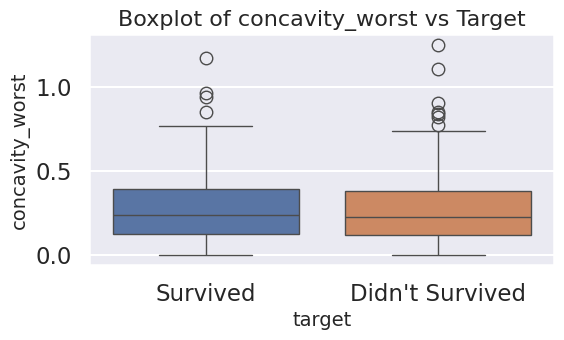

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='concave points_worst'>

Text(0.5, 1.0, 'Boxplot of concave points_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'concave points_worst')

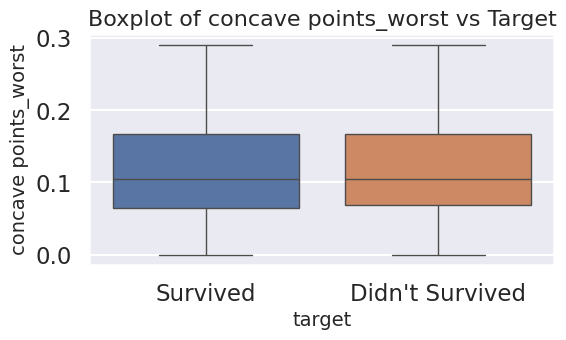

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='symmetry_worst'>

Text(0.5, 1.0, 'Boxplot of symmetry_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'symmetry_worst')

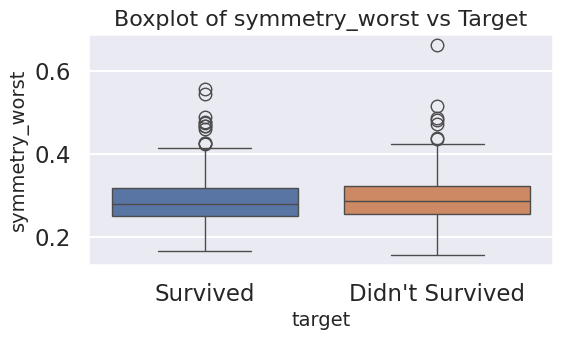

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='fractal_dimension_worst'>

Text(0.5, 1.0, 'Boxplot of fractal_dimension_worst vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'fractal_dimension_worst')

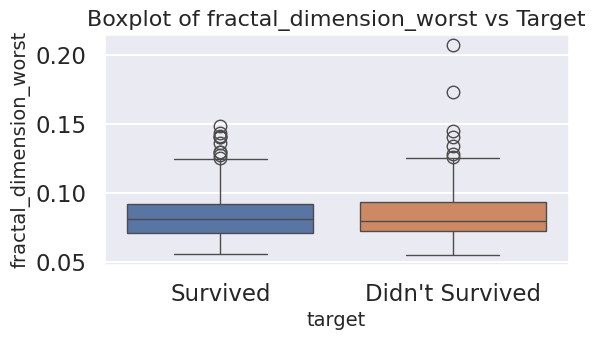

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='age'>

Text(0.5, 1.0, 'Boxplot of age vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'age')

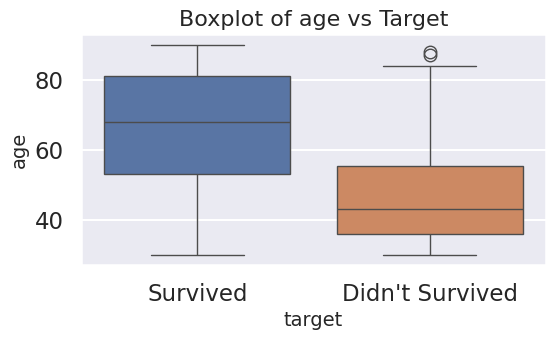

<Figure size 600x300 with 0 Axes>

<ipython-input-12-c8da27f086f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")


<Axes: xlabel='target', ylabel='duration'>

Text(0.5, 1.0, 'Boxplot of duration vs Target')

Text(0.5, 0, 'target')

Text(0, 0.5, 'duration')

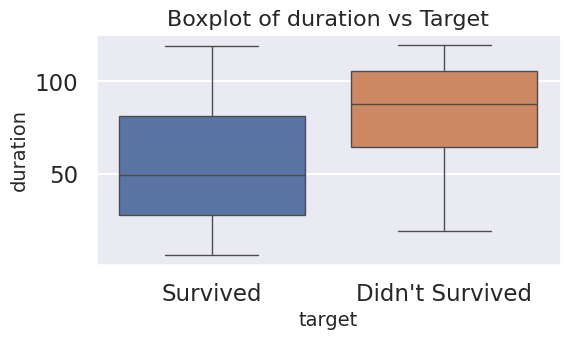

In [12]:
train_data['target'] = train_data['target'].map({1: 'Survived', 0: "Didn't Survived"})

numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'target']

sns.set(rc={'figure.figsize': (6, 3)})
sns.set_context("talk")

for column in numerical_columns:
  plt.figure(figsize=(6, 3))
  sns.boxplot(x='target', y=column, data=train_data, orient="v", palette="deep")

  plt.title(f'Boxplot of {column} vs Target', fontsize=16)
  plt.xlabel('target', fontsize=14)
  plt.ylabel(column, fontsize=14)

  plt.show()

It appears that there are some patients with more then one outlier, we'll remove them from the data set.

In [13]:
train_data = pd.read_csv('train_data.csv')

numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'target']

outliers_mask = pd.Series([False] * len(train_data))

for column in numerical_columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask |= (train_data[column] < lower_bound) | (train_data[column] > upper_bound)

train_data = train_data[~outliers_mask]

rows_removed = outliers_mask.sum()
print(f"Number of patients removed: {rows_removed}")
train_data.to_csv('train_data_02.csv')

Number of patients removed: 138


### EDA
###Visualizing Features
Apply transformations based on the features's skewness and remove features that still have significant skewness after the transformations

<Axes: xlabel='diagnosis', ylabel='count'>

Text(0.5, 1.0, 'diagnosis')

<Axes: xlabel='radius_mean', ylabel='Count'>

Text(0.5, 1.0, 'radius_mean')

<Axes: xlabel='texture_mean', ylabel='Count'>

Text(0.5, 1.0, 'texture_mean')

<Axes: xlabel='perimeter_mean', ylabel='Count'>

Text(0.5, 1.0, 'perimeter_mean')

<Axes: xlabel='area_mean', ylabel='Count'>

Text(0.5, 1.0, 'area_mean')

<Axes: xlabel='smoothness_mean', ylabel='Count'>

Text(0.5, 1.0, 'smoothness_mean')

<Axes: xlabel='compactness_mean', ylabel='Count'>

Text(0.5, 1.0, 'compactness_mean')

<Axes: xlabel='concavity_mean', ylabel='Count'>

Text(0.5, 1.0, 'concavity_mean')

<Axes: xlabel='concave points_mean', ylabel='Count'>

Text(0.5, 1.0, 'concave points_mean')

<Axes: xlabel='symmetry_mean', ylabel='Count'>

Text(0.5, 1.0, 'symmetry_mean')

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

Text(0.5, 1.0, 'fractal_dimension_mean')

<Axes: xlabel='radius_se', ylabel='Count'>

Text(0.5, 1.0, 'radius_se')

<Axes: xlabel='texture_se', ylabel='Count'>

Text(0.5, 1.0, 'texture_se')

<Axes: xlabel='perimeter_se', ylabel='Count'>

Text(0.5, 1.0, 'perimeter_se')

<Axes: xlabel='area_se', ylabel='Count'>

Text(0.5, 1.0, 'area_se')

<Axes: xlabel='smoothness_se', ylabel='Count'>

Text(0.5, 1.0, 'smoothness_se')

<Axes: xlabel='compactness_se', ylabel='Count'>

Text(0.5, 1.0, 'compactness_se')

<Axes: xlabel='concavity_se', ylabel='Count'>

Text(0.5, 1.0, 'concavity_se')

<Axes: xlabel='concave points_se', ylabel='Count'>

Text(0.5, 1.0, 'concave points_se')

<Axes: xlabel='symmetry_se', ylabel='Count'>

Text(0.5, 1.0, 'symmetry_se')

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

Text(0.5, 1.0, 'fractal_dimension_se')

<Axes: xlabel='radius_worst', ylabel='Count'>

Text(0.5, 1.0, 'radius_worst')

<Axes: xlabel='texture_worst', ylabel='Count'>

Text(0.5, 1.0, 'texture_worst')

<Axes: xlabel='perimeter_worst', ylabel='Count'>

Text(0.5, 1.0, 'perimeter_worst')

<Axes: xlabel='area_worst', ylabel='Count'>

Text(0.5, 1.0, 'area_worst')

<Axes: xlabel='smoothness_worst', ylabel='Count'>

Text(0.5, 1.0, 'smoothness_worst')

<Axes: xlabel='compactness_worst', ylabel='Count'>

Text(0.5, 1.0, 'compactness_worst')

<Axes: xlabel='concavity_worst', ylabel='Count'>

Text(0.5, 1.0, 'concavity_worst')

<Axes: xlabel='concave points_worst', ylabel='Count'>

Text(0.5, 1.0, 'concave points_worst')

<Axes: xlabel='symmetry_worst', ylabel='Count'>

Text(0.5, 1.0, 'symmetry_worst')

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

Text(0.5, 1.0, 'fractal_dimension_worst')

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

<Axes: xlabel='stage_of_cancer', ylabel='count'>

Text(0.5, 1.0, 'stage_of_cancer')

<Axes: xlabel='treatment_administered', ylabel='count'>

Text(0.5, 1.0, 'treatment_administered')

<Axes: xlabel='duration', ylabel='Count'>

Text(0.5, 1.0, 'duration')

<Axes: xlabel='target', ylabel='Count'>

Text(0.5, 1.0, 'target')

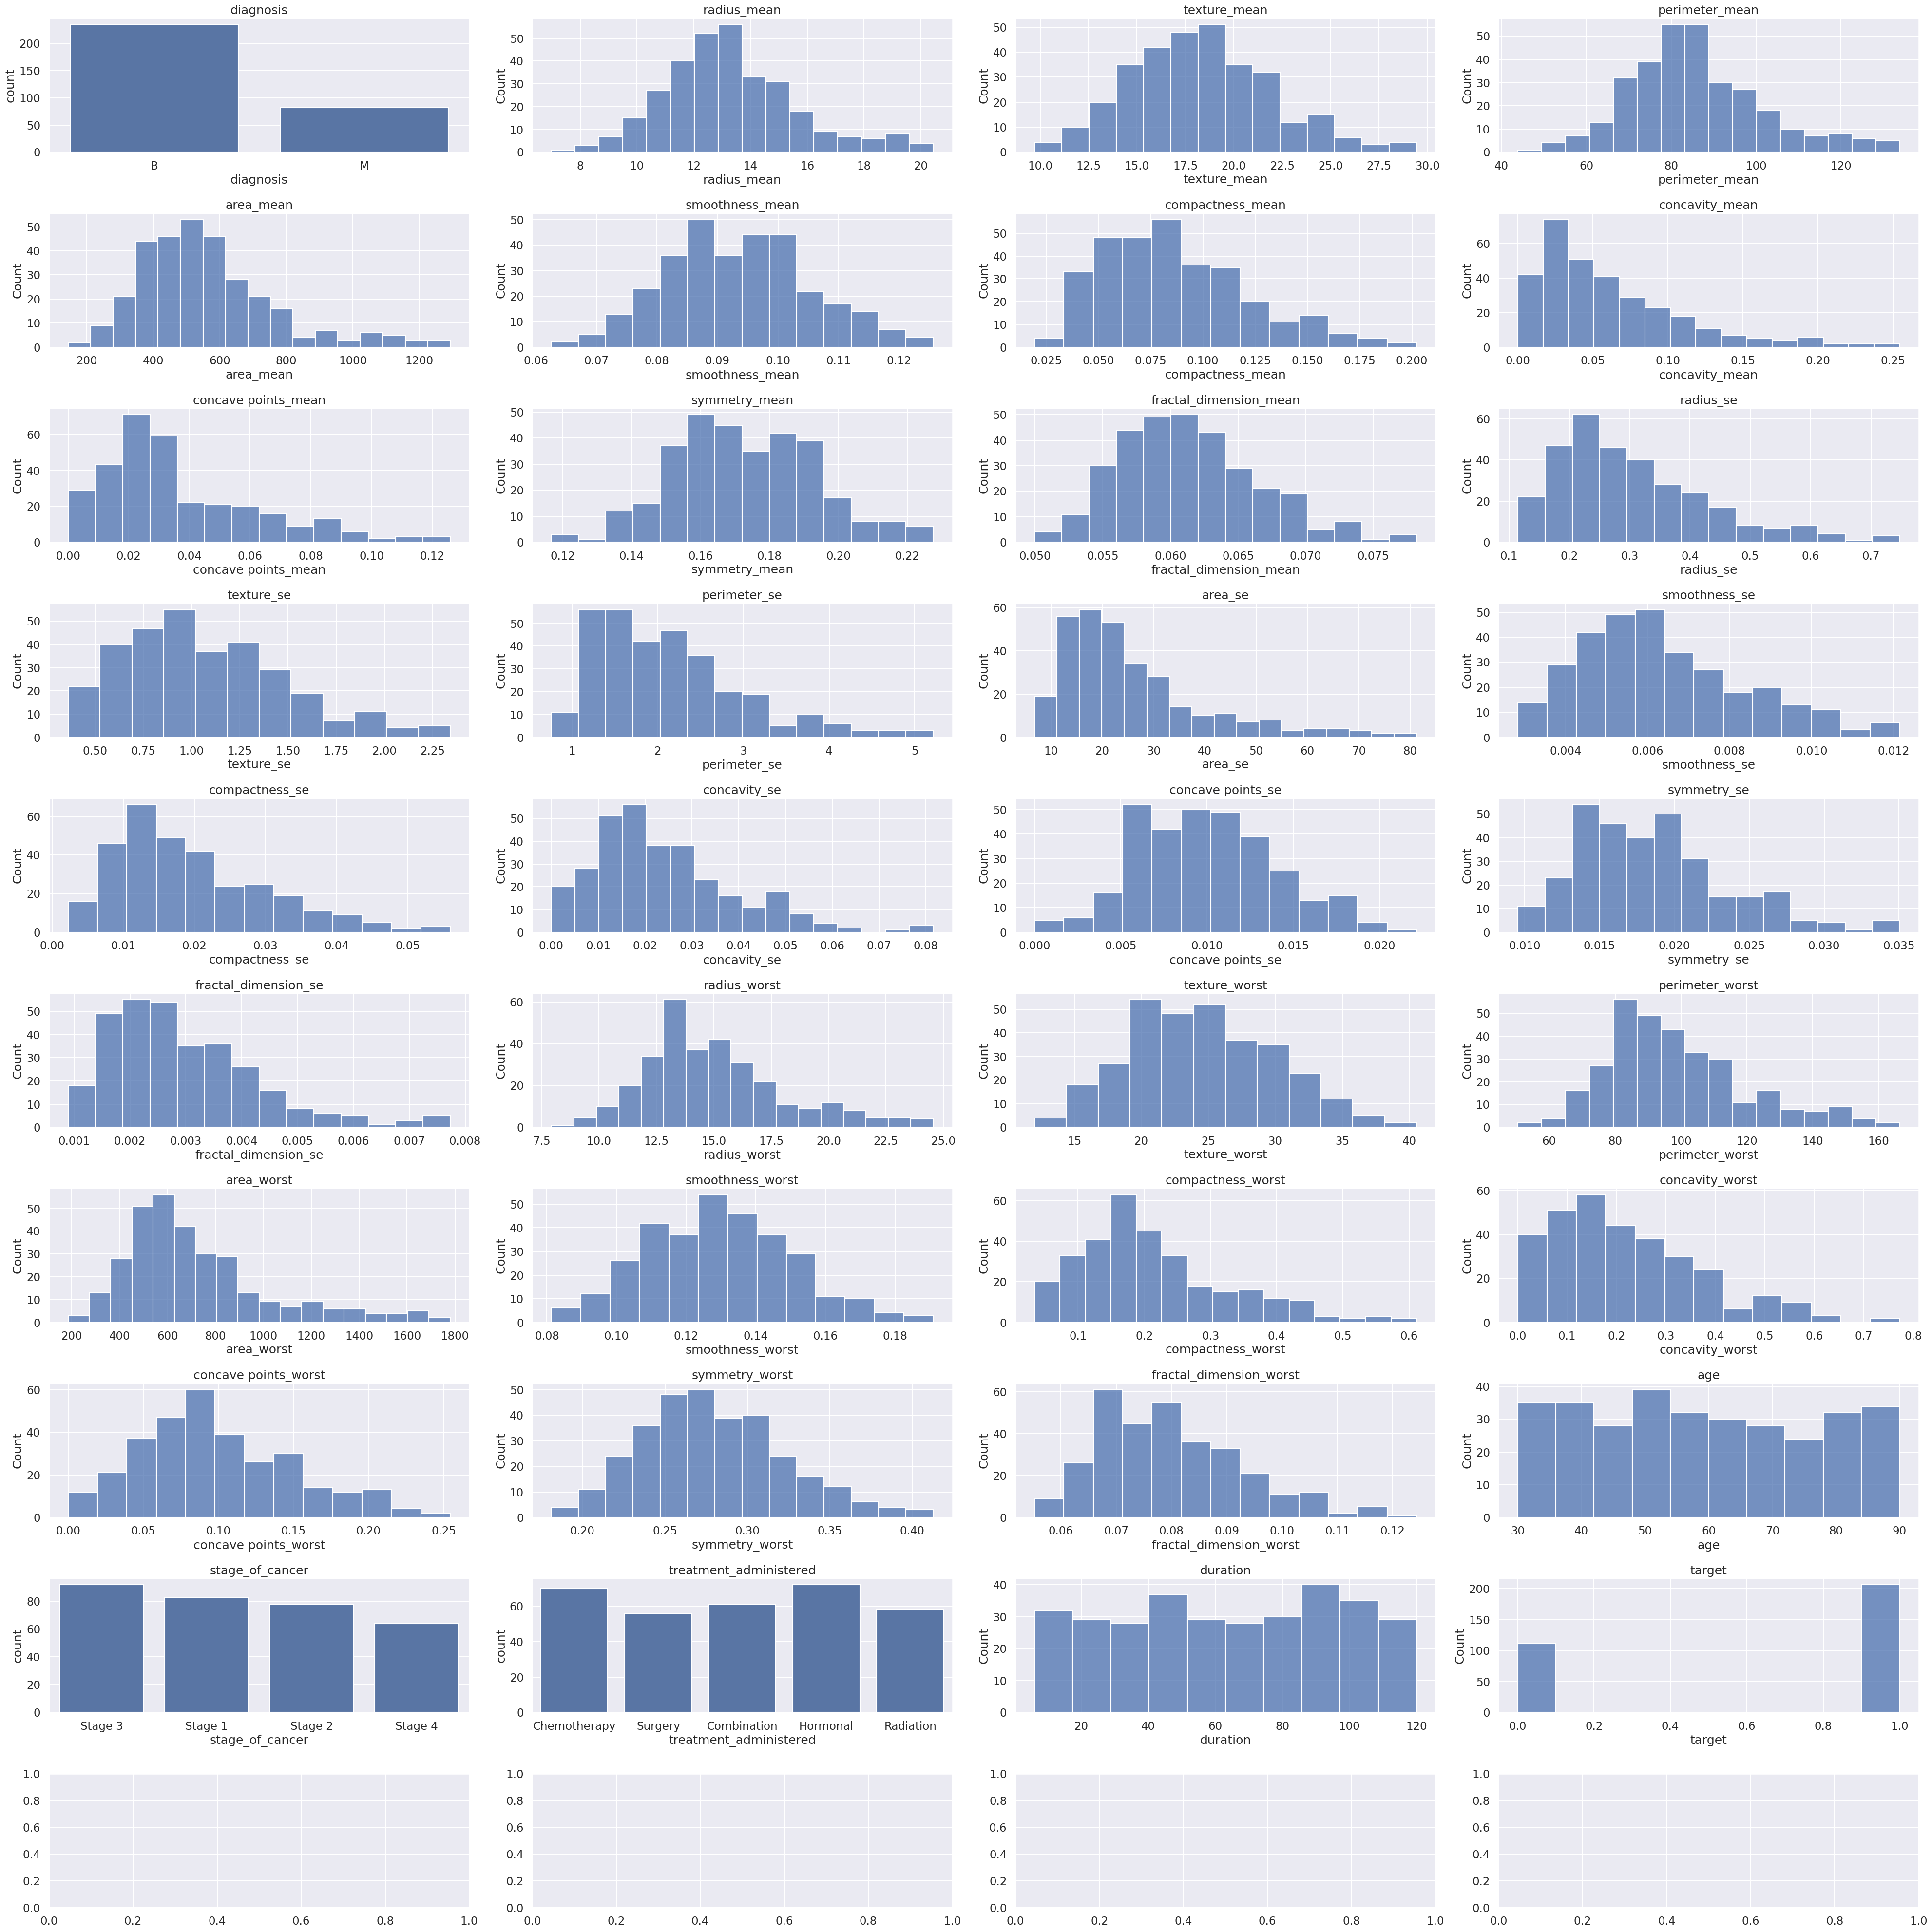

In [14]:
fig, axes = plt.subplots(10, 4, figsize=(40, 40))

axes = axes.flatten()

for index, columnName in enumerate(train_data.columns[1:]):
    ax = axes[index]
    if train_data[columnName].dtype == 'object':
        sns.countplot(x=columnName, data=train_data, ax=ax)
    else:
        sns.histplot(x=columnName, data=train_data, ax=ax)

    ax.set_title(columnName)

plt.tight_layout()
plt.show()

numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns[1:]

skewed_features = train_data[numerical_features].skew().sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skew': skewed_features})

print(skewness_df)

Now we'll perform Log Transformation for the features that has right skewness and Square Root Transformation to the features that has left skewness.

                             Skew
area_se                  1.500621
concavity_mean           1.341517
area_worst               1.259710
fractal_dimension_se     1.152364
area_mean                1.139781
concave points_mean      1.109217
perimeter_se             1.056725
radius_se                1.045883
concavity_se             0.982360
compactness_se           0.938201
compactness_worst        0.927227
concavity_worst          0.905529
symmetry_se              0.823085
radius_worst             0.803780
perimeter_worst          0.779180
compactness_mean         0.727498
fractal_dimension_worst  0.726821
smoothness_se            0.694778
texture_se               0.665351
perimeter_mean           0.634102
radius_mean              0.609254
fractal_dimension_mean   0.545257
concave points_worst     0.535519
symmetry_worst           0.455974
texture_mean             0.377752
texture_worst            0.264952
smoothness_worst         0.241018
concave points_se        0.228033
smoothness_mea

<Axes: xlabel='area_se', ylabel='Count'>

Text(0.5, 1.0, 'area_se (Transformed)')

<Axes: xlabel='area_worst', ylabel='Count'>

Text(0.5, 1.0, 'area_worst (Transformed)')

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

Text(0.5, 1.0, 'fractal_dimension_se (Transformed)')

<Axes: xlabel='area_mean', ylabel='Count'>

Text(0.5, 1.0, 'area_mean (Transformed)')

<Axes: xlabel='perimeter_se', ylabel='Count'>

Text(0.5, 1.0, 'perimeter_se (Transformed)')

<Axes: xlabel='radius_se', ylabel='Count'>

Text(0.5, 1.0, 'radius_se (Transformed)')

<Axes: xlabel='compactness_se', ylabel='Count'>

Text(0.5, 1.0, 'compactness_se (Transformed)')

<Axes: xlabel='compactness_worst', ylabel='Count'>

Text(0.5, 1.0, 'compactness_worst (Transformed)')

<Axes: xlabel='symmetry_se', ylabel='Count'>

Text(0.5, 1.0, 'symmetry_se (Transformed)')

<Axes: xlabel='radius_worst', ylabel='Count'>

Text(0.5, 1.0, 'radius_worst (Transformed)')

<Axes: xlabel='perimeter_worst', ylabel='Count'>

Text(0.5, 1.0, 'perimeter_worst (Transformed)')

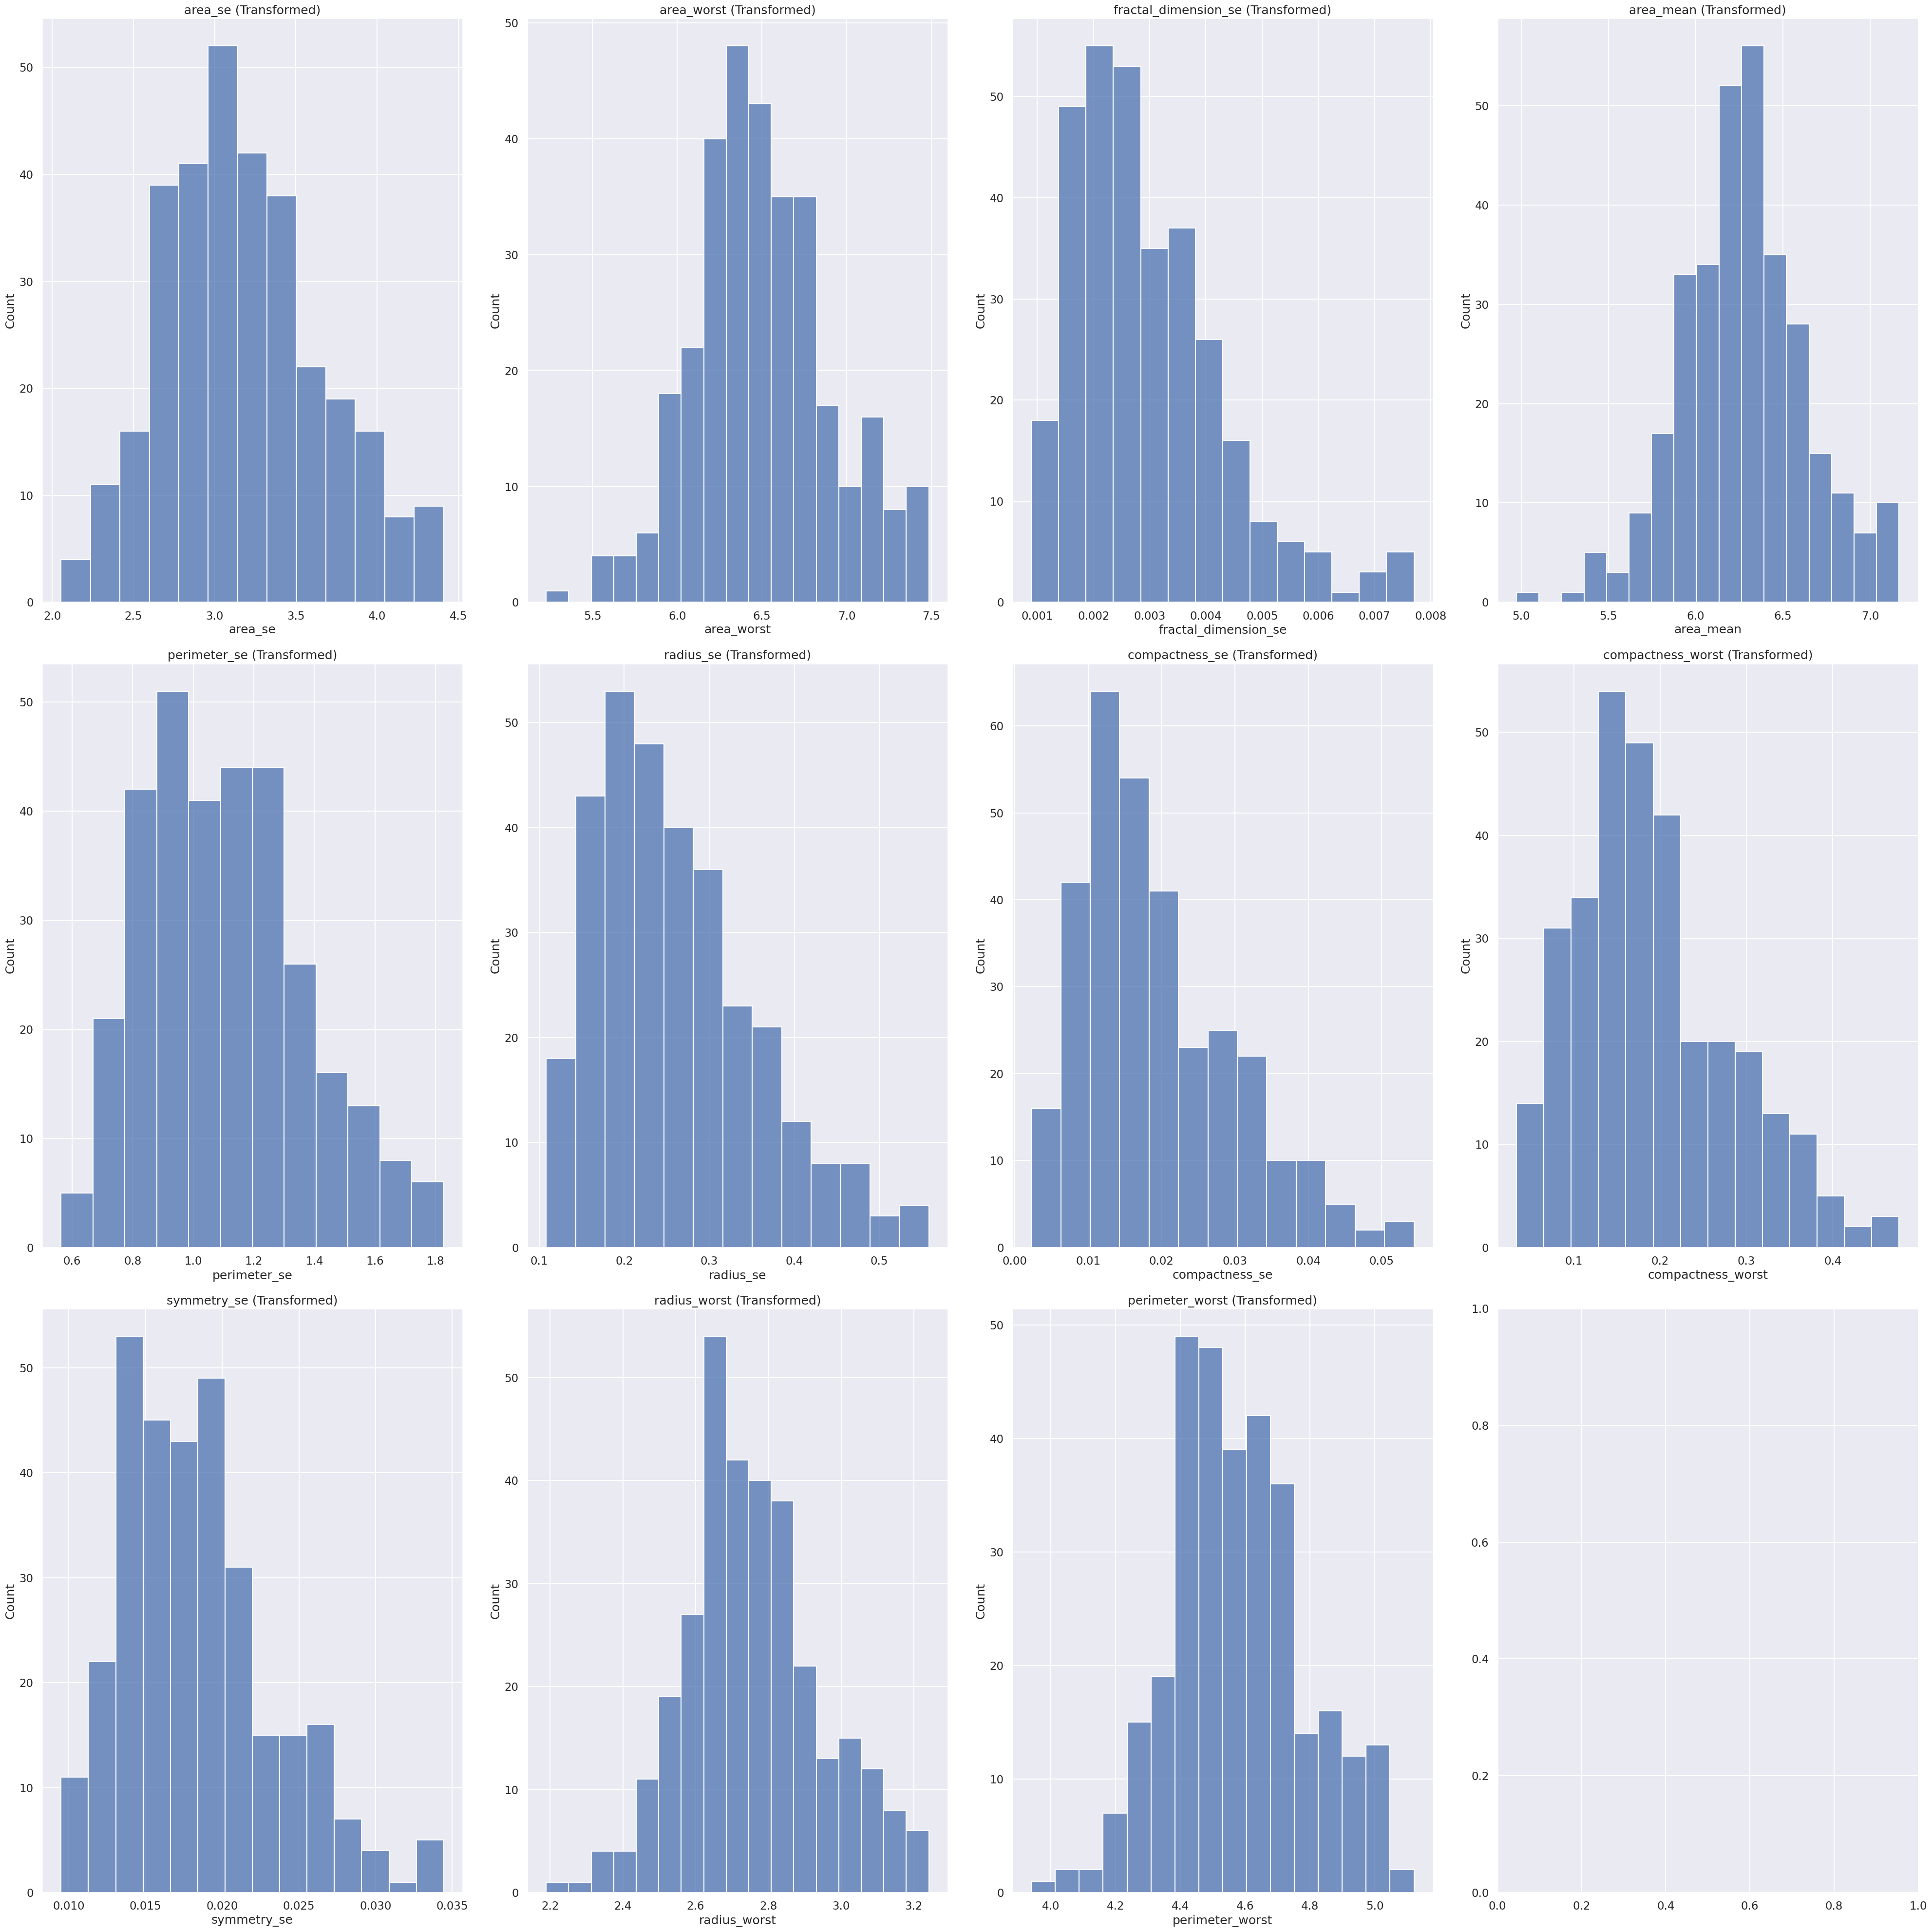

In [15]:
# Threshold for skewness
threshold = 0.75

def transform_features(train_data, skewed_features, threshold=0.75):
    changed_features = {}
    for feature in skewed_features.index:
        skewness = skewed_features[feature]
        original_values = train_data[feature].copy()

        if skewness > threshold:
            if (train_data[feature] > 0).all():
                train_data[feature] = np.log1p(train_data[feature])
            else:
                print(f"Skipping {feature} due to negative or zero values in the data.")

        elif skewness < -threshold:
            train_data[feature] = np.sqrt(train_data[feature].abs())

        if not train_data[feature].equals(original_values):
            changed_features[feature] = {
                'original_skewness': skewness,
                'new_skewness': train_data[feature].skew()
            }

    return train_data, changed_features

train_data_transformed, changed_features = transform_features(train_data.copy(), skewed_features, threshold)

if changed_features:
    print("\nFeatures with Skewness Changes:")
    for feature, skewness_info in changed_features.items():
        print(f"Feature: {feature}")
        print(f"  Original Skewness: {skewness_info['original_skewness']}")
        print(f"  New Skewness: {skewness_info['new_skewness']}\n")
else:
    print("No features had significant changes in skewness.")

if changed_features:
    fig, axes = plt.subplots(3, 4, figsize=(40, 40))
    axes = axes.flatten() if len(changed_features) > 1 else [axes]

    for ax, (feature, _) in zip(axes, changed_features.items()):
        sns.histplot(train_data_transformed[feature], ax=ax)
        ax.set_title(f"{feature} (Transformed)")

    plt.tight_layout()
    plt.show()

After the transformations, we'll remove the features that still has high skewness

In [16]:
final_skewness = train_data_transformed[numerical_features].skew().sort_values(ascending=False)

features_to_remove = final_skewness[final_skewness.abs() > threshold].index

if len(features_to_remove) > 0:
    print(f"\nFeatures to be removed due to high skewness (>{threshold}):")
    for feature in features_to_remove:
        print(f" - {feature}")
else:
    print("\nNo features to remove. All features are within the skewness threshold.")

train_data_cleaned = train_data_transformed.drop(columns=features_to_remove)

print(f"\nNumber of features removed: {len(features_to_remove)}")

train_data_cleaned.to_csv('train_data_03.csv', index=False)


Features to be removed due to high skewness (>0.75):
 - concavity_mean
 - fractal_dimension_se
 - concave points_mean
 - concavity_se
 - compactness_se
 - concavity_worst
 - radius_se
 - symmetry_se

Number of features removed: 8


### Feature Selection Based on Correlation Matrix
Iterative process where we remove one feature at a time, re-calculate the correlation matrix, and then reassess which features to remove next. This approach can help address any changes in correlation dynamics after each feature is removed.

Removed perimeter_mean due to high correlation with radius_mean
Removed area_mean due to high correlation with radius_mean
Removed area_se due to high correlation with perimeter_se
Removed radius_worst due to high correlation with radius_mean
Removed texture_worst due to high correlation with texture_mean
Removed perimeter_worst due to high correlation with radius_mean
Removed area_worst due to high correlation with radius_mean
Removed smoothness_worst due to high correlation with smoothness_mean
Removed compactness_worst due to high correlation with compactness_mean


<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Final Correlation Matrix for Numerical Features')

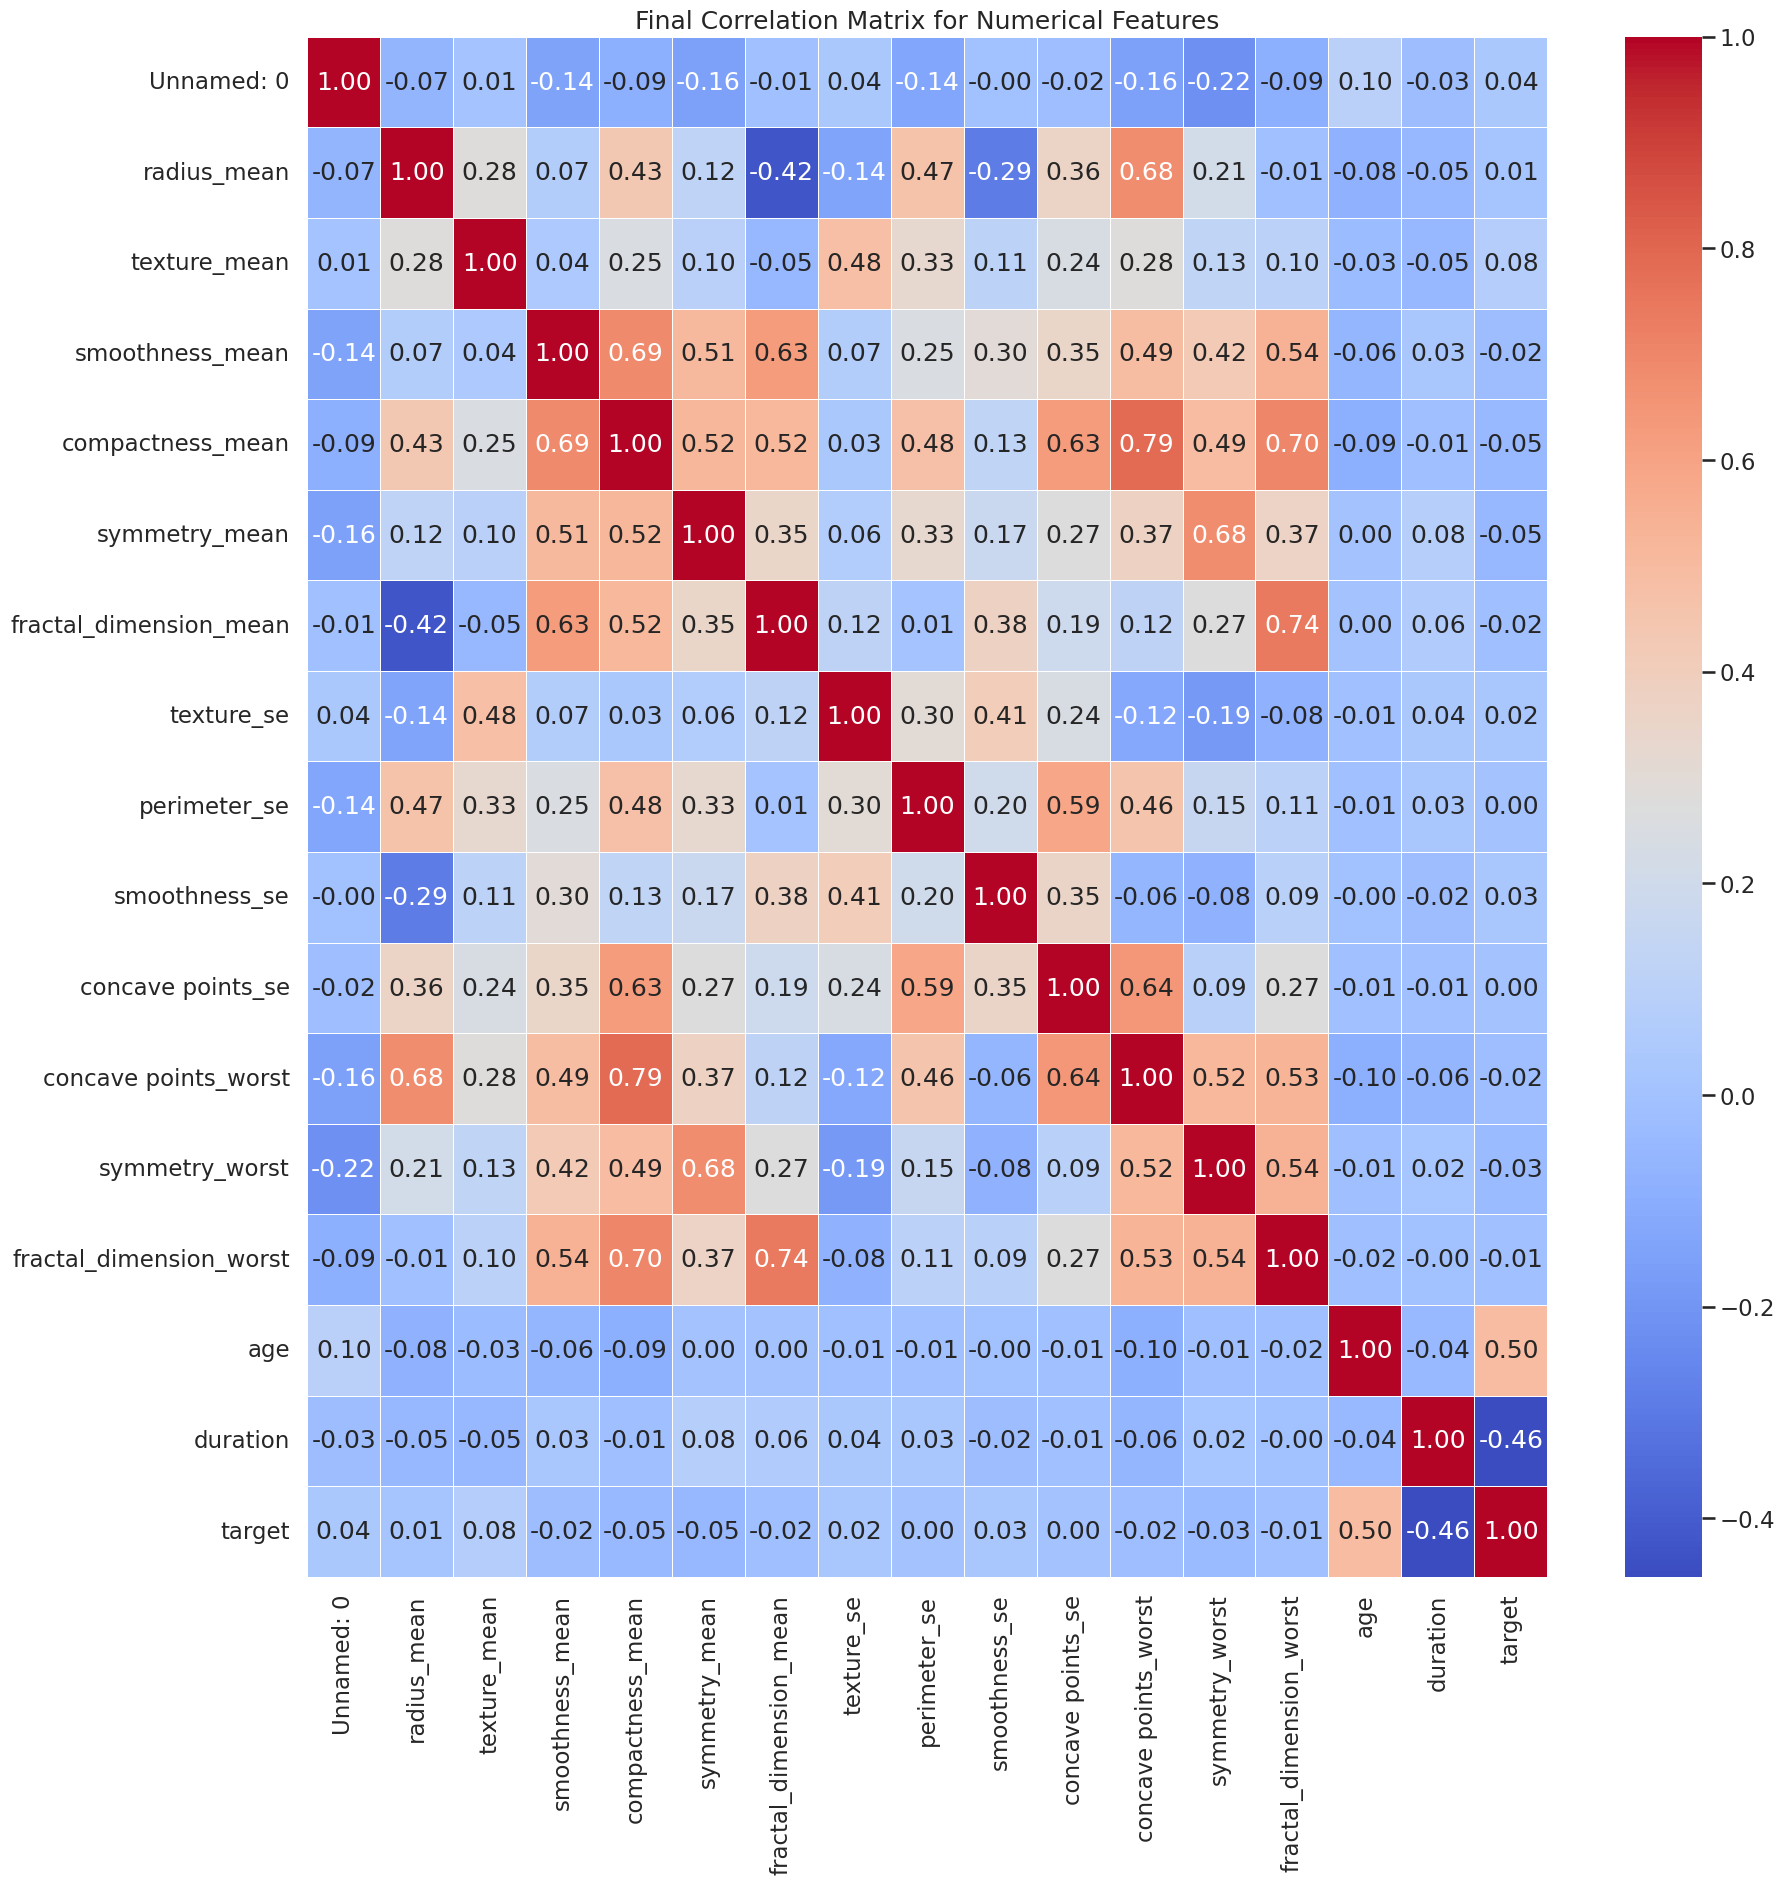

In [17]:
numerical_data = train_data_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_threshold = 0.8

def find_most_correlated(data, threshold):
    correlation_matrix = data.corr()
    features = correlation_matrix.columns
    for i in range(len(features)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                return (features[i], features[j])
    return None

while True:
    pair = find_most_correlated(numerical_data, correlation_threshold)
    if pair is None:
        break
    feature_to_remove = pair[0]
    numerical_data = numerical_data.drop(columns=[feature_to_remove])
    print(f"Removed {feature_to_remove} due to high correlation with {pair[1]}")

plt.figure(figsize=(20, 20))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Final Correlation Matrix for Numerical Features')
plt.show()

numerical_data.to_csv('reduced_data.csv', index=False)

### Feature Scaling
Standardize or normalize your data especially for ANN.



In [18]:
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

### Modularized Data Processing Functions for Predictive Models:


In [19]:
def create_target_column(dataset):
    dataset['target'] = (dataset['survival_probability'] > 0.5).astype(int)
    dataset.drop(columns=['survival_probability'], inplace=True)
    return dataset

def get_outliers_mask(dataset):

    numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    outliers_mask = pd.Series([False] * len(dataset), index=dataset.index)

    for column in numerical_columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask |= (dataset[column] < lower_bound) | (dataset[column] > upper_bound)

    return outliers_mask

def outliers_removal(X, y):

    outliers_mask = get_outliers_mask(X)
    X = X[~outliers_mask]
    y = y.loc[X.index]
    return X, y

def impute_values(X):

    X.replace('?', pd.NA, inplace=True)
    X.dropna(inplace=True)
    return X

def transform_features(X, skewness_threshold=0.75):
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

    skewed_features = X[numerical_columns].skew().sort_values(ascending=False)

    for feature in skewed_features.index:
        skewness = skewed_features[feature]

        if skewness > skewness_threshold:
            if (X[feature] > 0).all():
                X[feature] = np.log1p(X[feature])
            else:
                print(f"Skipping log transformation for {feature} due to zero or negative values.")
        elif skewness < -skewness_threshold:
            X[feature] = np.sqrt(np.abs(X[feature]))

    return X

def remove_skewed_features(X, skewness_threshold=0.75):
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
    skewed_features = X[numerical_columns].skew().sort_values(ascending=False)

    features_to_remove = skewed_features[abs(skewed_features) > skewness_threshold].index

    if len(features_to_remove) > 0:
        X = X.drop(columns=features_to_remove)

    return X

def one_hot_encode(X):
    categorical_columns = ['diagnosis', 'stage_of_cancer', 'treatment_administered']
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
    return X

def feature_selection_correlation(X, correlation_threshold=0.8):
    def find_most_correlated(data, threshold):
        correlation_matrix = data.corr()
        features = correlation_matrix.columns
        max_correlation = threshold
        feature_to_remove = None
        for i in range(len(features)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > max_correlation:
                    max_correlation = abs(correlation_matrix.iloc[i, j])
                    feature_to_remove = features[i] if abs(correlation_matrix.iloc[i, j]) >= abs(correlation_matrix.iloc[j, i]) else features[j]
        return feature_to_remove

    while True:
        feature_to_remove = find_most_correlated(X, correlation_threshold)
        if feature_to_remove is None:
            break
        X = X.drop(columns=[feature_to_remove])

    return X

def split_data(dataset):
    X = dataset.drop(columns=['target'])
    y = dataset['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    return X_train, X_test, y_train, y_test

def apply_transformations(X, y):
    X, y = outliers_removal(X, y)
    X = impute_values(X)
    X = transform_features(X)
    X = remove_skewed_features(X)
    X = one_hot_encode(X)
    X = feature_selection_correlation(X)

    return X, y

def process_data(dataset):
    dataset = create_target_column(dataset)
    X_train, X_test, y_train, y_test = split_data(dataset)
    X_train, y_train = apply_transformations(X_train, y_train)
    X_test, y_test = apply_transformations(X_test, y_test)
    common_columns = X_train.columns.intersection(X_test.columns)
    X_train = X_train[common_columns]
    X_test = X_test[common_columns]

    return X_train, X_test, y_train, y_test

### Breakdown of the Functions

1.   Create Target Column and Remove Survival Probability
2.   Outliers Removal: Identifies and removes outliers using the IQR method for all numerical features.
3.   Impute Missing Values: Handles missing values by replacing ? with NaN and dropping rows with missing values.
4.   Transformation for Skewness Correction: Applies log transformation for right-skewed data and square root transformation for left-skewed data.
5.   Remove Highly Skewed Features: Removes features with high skewness that remain even after transformations.
6.   One-Hot Encoding: Converts categorical variables into dummy variables (binary format), excluding the first category to avoid multicollinearity.
7.   Feature Selection Based on Correlation: Identifies and removes features that have a correlation higher than the specified threshold (e.g., 0.8).
8.   Split Data into Train and Test Sets (with Stratification).



In [20]:
td = pd.read_csv('data.csv')
X_train, X_test, y_train, y_test = process_data(td)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
results = {}

<ipython-input-19-b0ac60b7fdca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)
<ipython-input-19-b0ac60b7fdca>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-19-b0ac60b7fdca>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = np.log1p(X[feature])


Skipping log transformation for concavity_mean due to zero or negative values.
Skipping log transformation for concave points_mean due to zero or negative values.
Skipping log transformation for concavity_se due to zero or negative values.
Skipping log transformation for concavity_worst due to zero or negative values.
Skipping log transformation for concavity_mean due to zero or negative values.
Skipping log transformation for concave points_mean due to zero or negative values.
Skipping log transformation for concavity_se due to zero or negative values.
Skipping log transformation for concavity_worst due to zero or negative values.
X_train shape: (255, 21)
X_test shape: (61, 21)
y_train shape: (255,)
y_test shape: (61,)


<ipython-input-19-b0ac60b7fdca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)
<ipython-input-19-b0ac60b7fdca>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-19-b0ac60b7fdca>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = np.log1p(X[feature])


# Logistic Regression


### Basic Training Function
This function will just train the logistic regression model on the entire training set without any cross-validation.

In [21]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

### Cross-Validation Training Function
This function will perform cross-validation using 5 folds.

In [22]:
def train_and_evaluate_logistic_regression_with_cv(X_train, y_train, n_splits=5):
    model = LogisticRegression(max_iter=1000, random_state=42)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    cv_results = []
    for train_index, val_index in kf.split(X_train):
        X_train_k, X_val_k = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_k, y_train_k)
        results = evaluate_logistic_regression(model, X_val_k, y_val_k, f"Validation Fold {len(cv_results)+1}")
        cv_results.append(results)

    # Calculate average of the results
    average_results = pd.DataFrame(cv_results).mean().to_dict()
    print(f"Average K-Folds results: {average_results}")

    return model, average_results

### Evaluation Function
This function evaluates the model and returns the results.



In [23]:
def evaluate_logistic_regression(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    cm = confusion_matrix(y, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    plt.figure(figsize=(6, 3))
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return {'Accuracy': accuracy, 'ROC AUC': roc_auc, 'Sensitivity': sensitivity, 'Specificity': specificity}


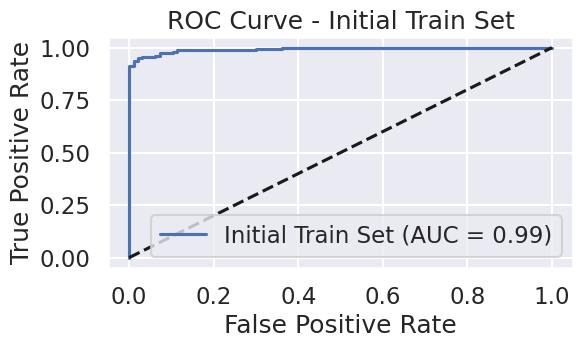

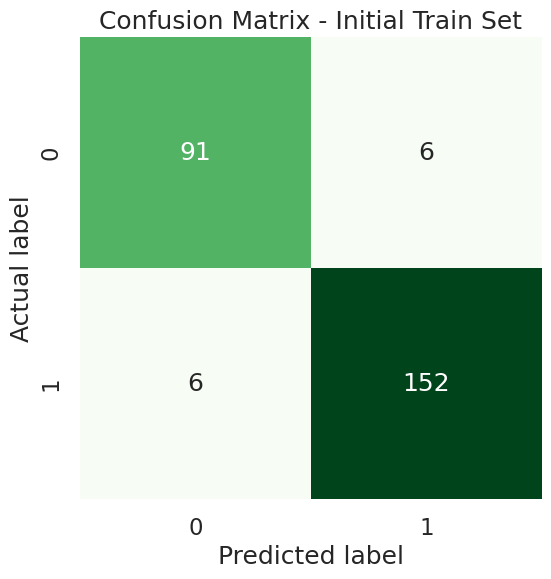

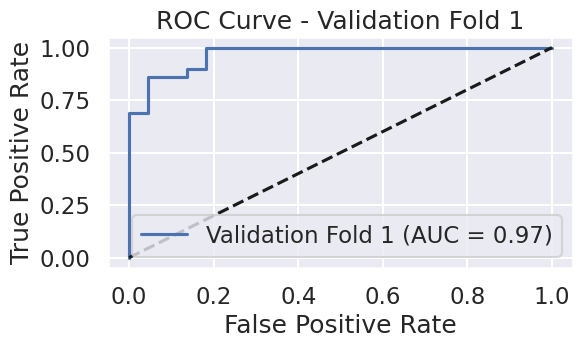

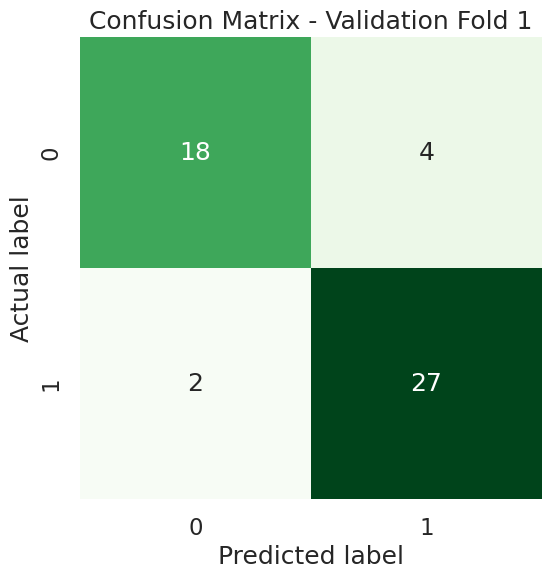

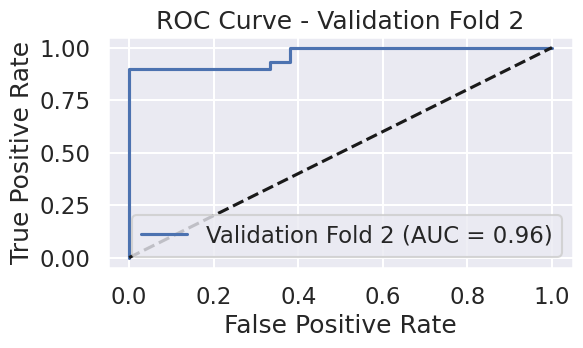

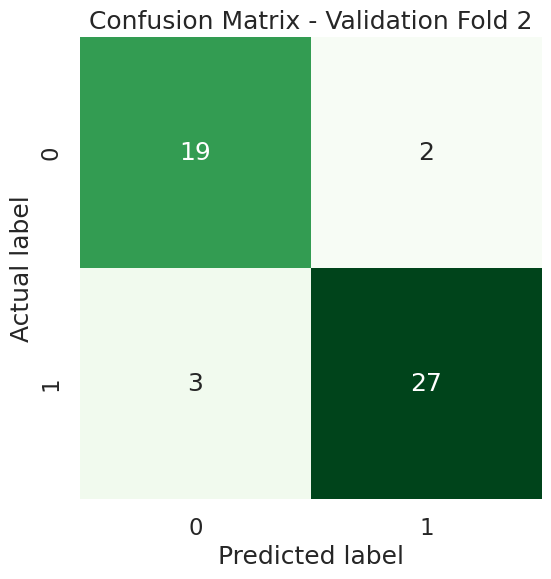

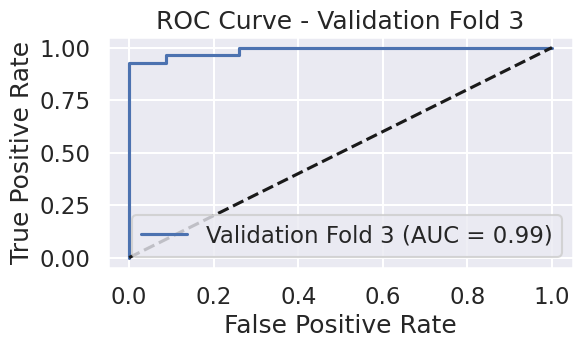

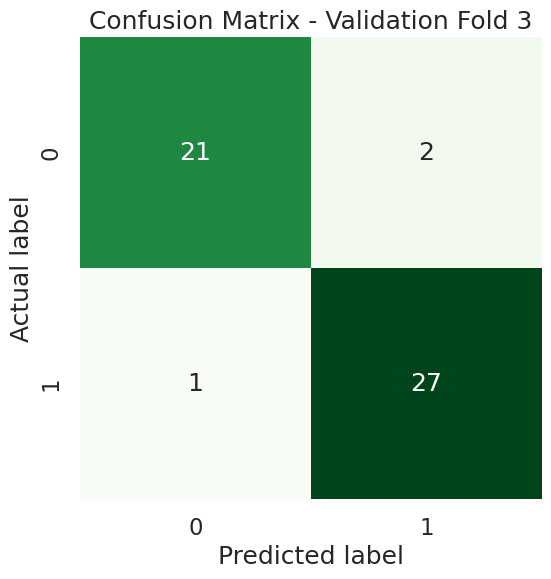

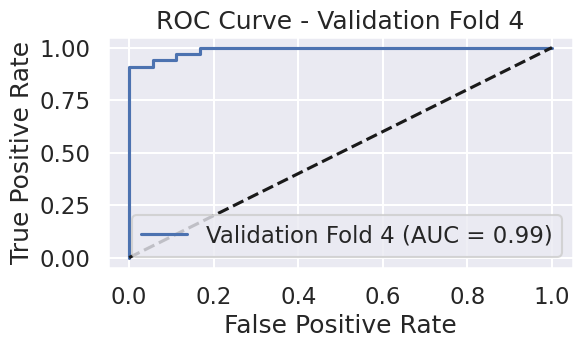

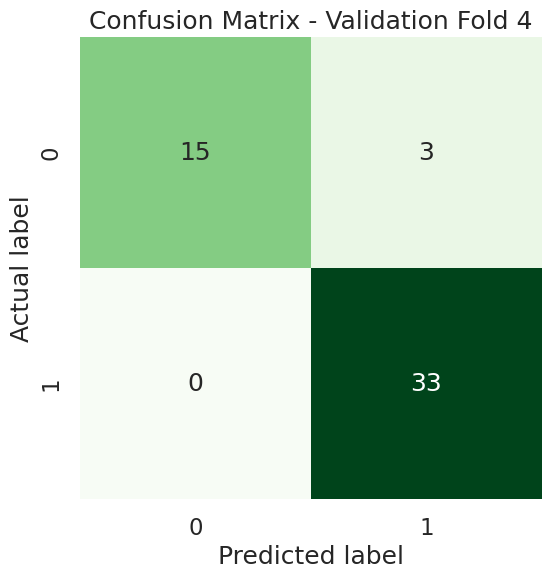

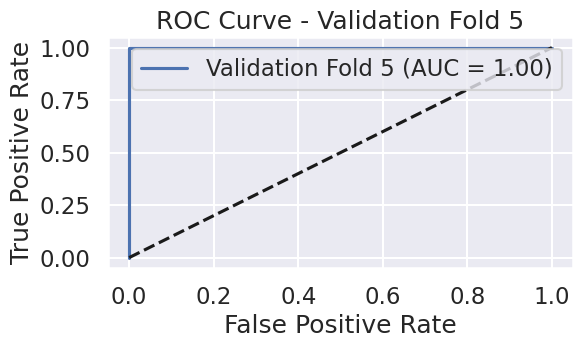

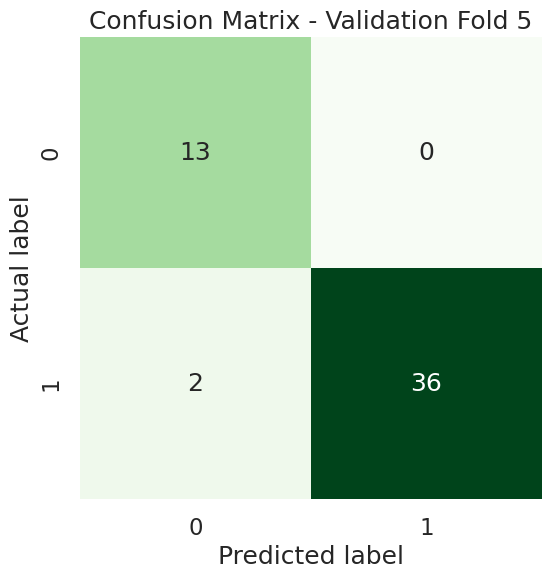

Average K-Folds results: {'Accuracy': 0.9254901960784314, 'ROC AUC': 0.9819241461520323, 'Sensitivity': 0.9485377236193934, 'Specificity': 0.8938641069075853}


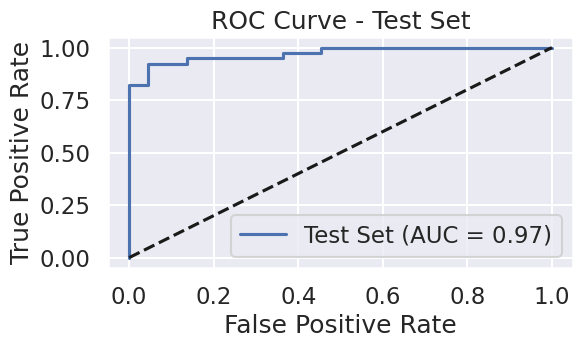

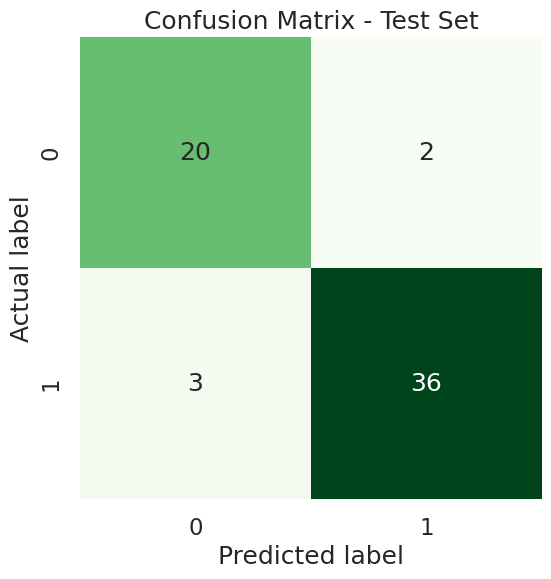

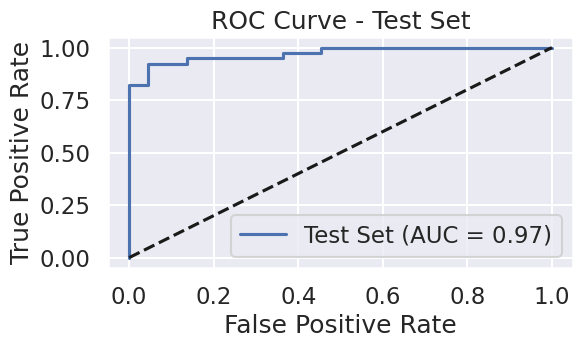

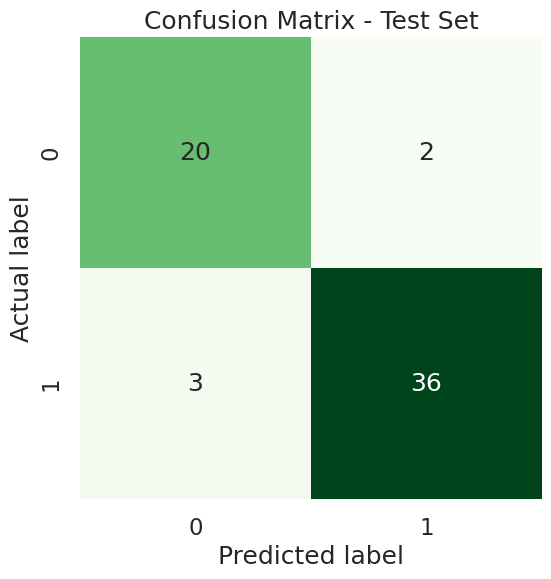

Accuracy   ROC AUC  Sensitivity  Specificity
Logistic Regression         0.952941  0.992431     0.962025     0.938144
Logistic Regression (CV)    0.925490  0.981924     0.948538     0.893864
Logistic Regression (Test)  0.918033  0.970862     0.923077     0.909091

In [24]:
initial_lr_model = train_logistic_regression(X_train, y_train)

original_train_results = evaluate_logistic_regression(initial_lr_model, X_train, y_train, "Initial Train Set")

cv_lr_model, cv_train_results = train_and_evaluate_logistic_regression_with_cv(X_train, y_train)

test_results = evaluate_logistic_regression(cv_lr_model, X_test, y_test, "Test Set")

test_results = evaluate_logistic_regression(cv_lr_model, X_test, y_test, "Test Set")

results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results
}).T

display(results_df)

# Decision Tree
###Basic train of the Decision Tree Model

In [25]:
def train_decision_tree(X_train, y_train, criterion='gini', max_depth=3, min_samples_split=10, min_samples_leaf=5):
    dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=42)
    dt_model.fit(X_train, y_train)
    return dt_model

### Train the Desicion Tree with 5-Folds Cross-Validation

In [26]:
def train_decision_tree_with_cv(X_train, y_train, n_splits=5, criterion='gini', max_depth=3, min_samples_split=10, min_samples_leaf=5):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train):
        X_train_k, _ = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_k, _ = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_k, y_train_k)

    return model

### Evaluate the Decision Tree Model

In [27]:
def visualize_tree(dt_model, feature_names):
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=['0', '1'], rounded=True)
    plt.title('Decision Tree Visualization')
    plt.show()

def evaluate_decision_tree(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    cm = confusion_matrix(y, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    plt.figure(figsize=(6, 3))
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return {'Accuracy': accuracy, 'ROC AUC': roc_auc, 'Sensitivity': sensitivity, 'Specificity': specificity}

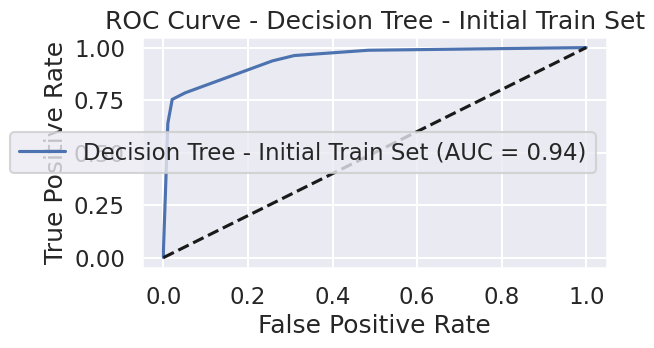

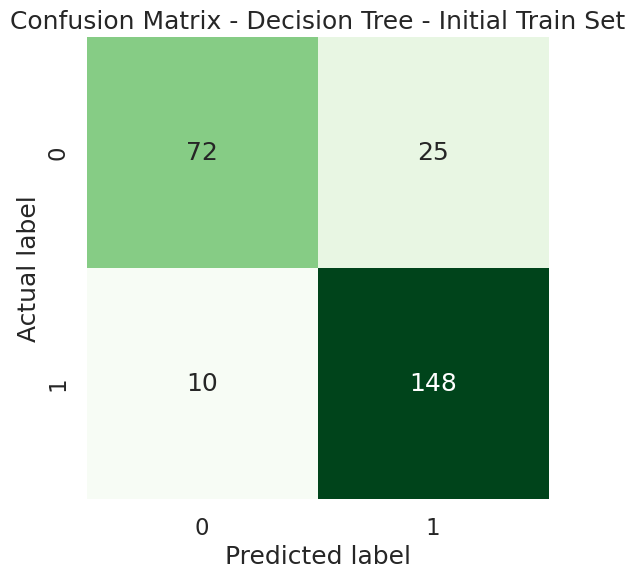

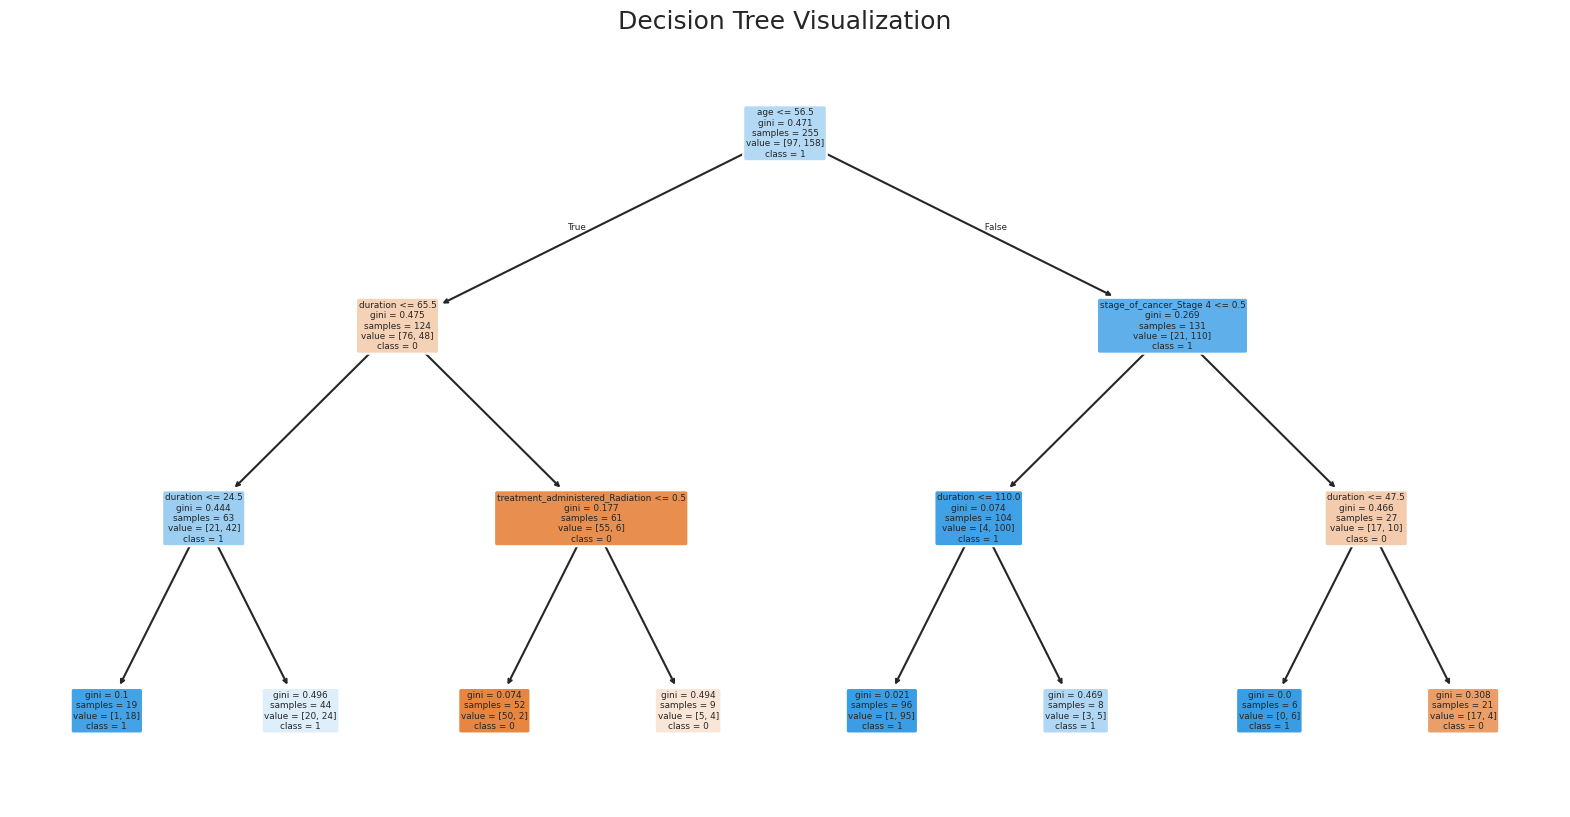

Accuracy   ROC AUC  Sensitivity  Specificity
Logistic Regression         0.952941  0.992431     0.962025     0.938144
Logistic Regression (CV)    0.925490  0.981924     0.948538     0.893864
Logistic Regression (Test)  0.918033  0.970862     0.923077     0.909091
Decision Tree               0.862745  0.943886     0.936709     0.742268

In [28]:
dt_initial = train_decision_tree(X_train, y_train)
initial_train_results_dt = evaluate_decision_tree(dt_initial, X_train, y_train, "Decision Tree - Initial Train Set")
visualize_tree(dt_initial, X_train.columns)

results["Decision Tree - Initial Train Set"] = initial_train_results_dt

results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree': initial_train_results_dt,
}).T
display(results_df)

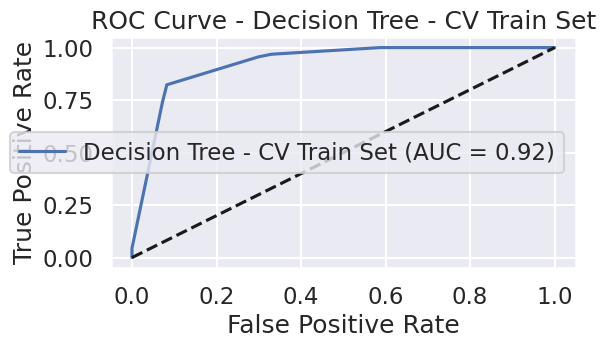

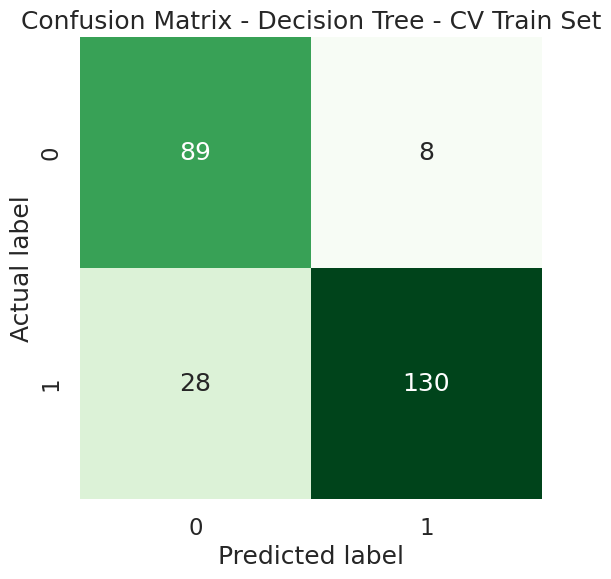

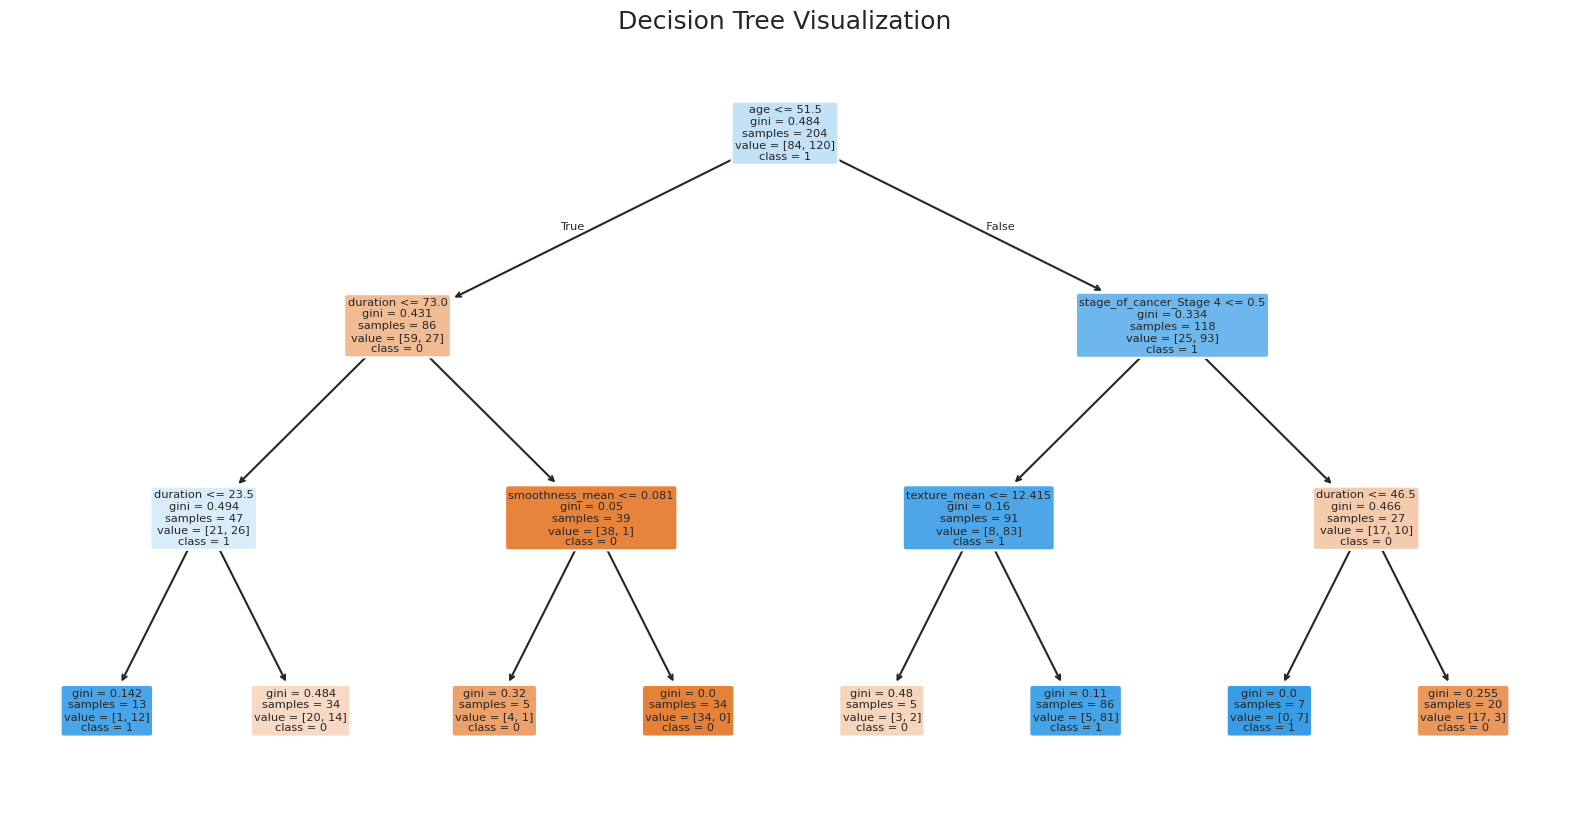

Accuracy   ROC AUC  Sensitivity  Specificity
Logistic Regression         0.952941  0.992431     0.962025     0.938144
Logistic Regression (CV)    0.925490  0.981924     0.948538     0.893864
Logistic Regression (Test)  0.918033  0.970862     0.923077     0.909091
Decision Tree               0.862745  0.943886     0.936709     0.742268
Decision Tree (CV)          0.858824  0.924670     0.822785     0.917526

In [29]:
dt_cv = train_decision_tree_with_cv(X_train, y_train)
cv_train_results_dt = evaluate_decision_tree(dt_cv, X_train, y_train, "Decision Tree - CV Train Set")
visualize_tree(dt_cv, X_train.columns)
results["Decision Tree - CV Train Set"] = cv_train_results_dt

results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree': initial_train_results_dt,
    'Decision Tree (CV)': cv_train_results_dt
}).T
display(results_df)

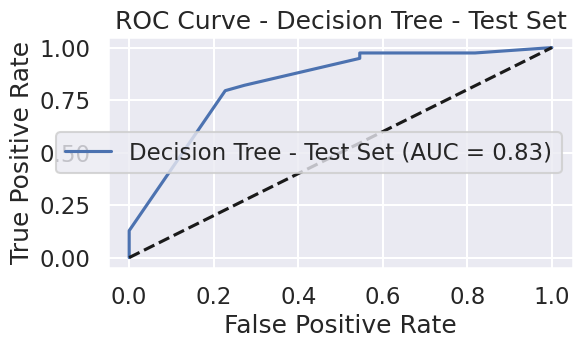

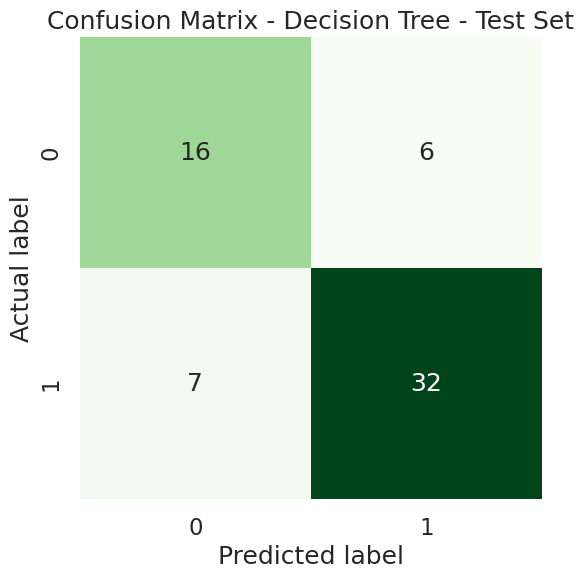

Accuracy   ROC AUC  Sensitivity  Specificity
Logistic Regression         0.952941  0.992431     0.962025     0.938144
Logistic Regression (CV)    0.925490  0.981924     0.948538     0.893864
Logistic Regression (Test)  0.918033  0.970862     0.923077     0.909091
Decision Tree               0.862745  0.943886     0.936709     0.742268
Decision Tree (CV)          0.858824  0.924670     0.822785     0.917526
Decision Tree (Test)        0.786885  0.828089     0.820513     0.727273

In [30]:
test_results_dt = evaluate_decision_tree(dt_cv, X_test, y_test, "Decision Tree - Test Set")
results["Decision Tree - Test Set"] = test_results_dt

results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree': initial_train_results_dt,
    'Decision Tree (CV)': cv_train_results_dt,
    'Decision Tree (Test)': test_results_dt
}).T
display(results_df)

Simulating CHAID

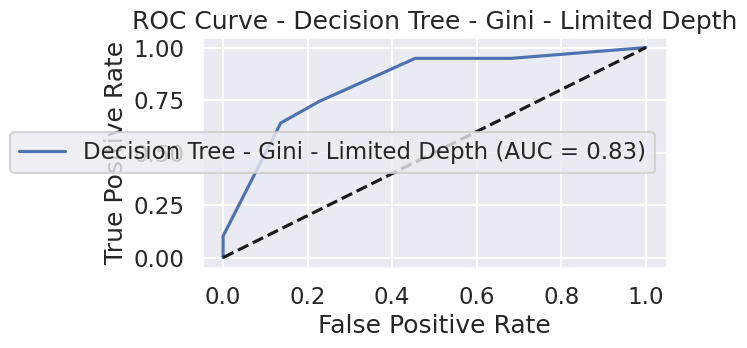

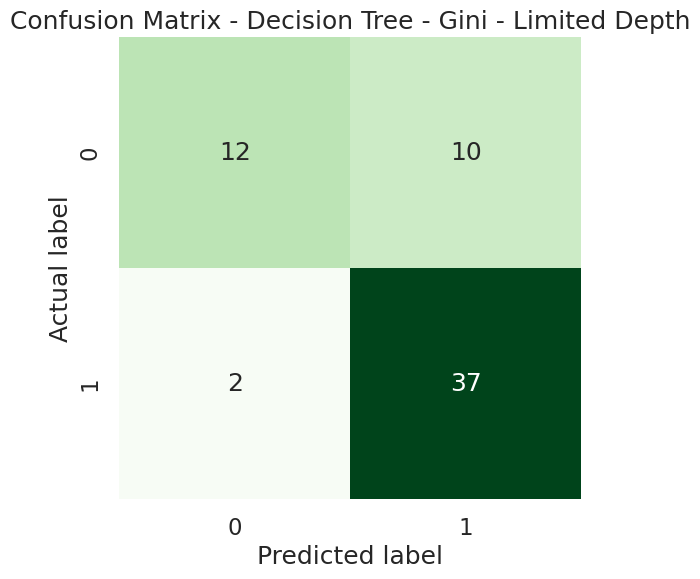

{'Accuracy': 0.8032786885245902,
 'ROC AUC': 0.8315850815850816,
 'Sensitivity': 0.9487179487179487,
 'Specificity': 0.5454545454545454}

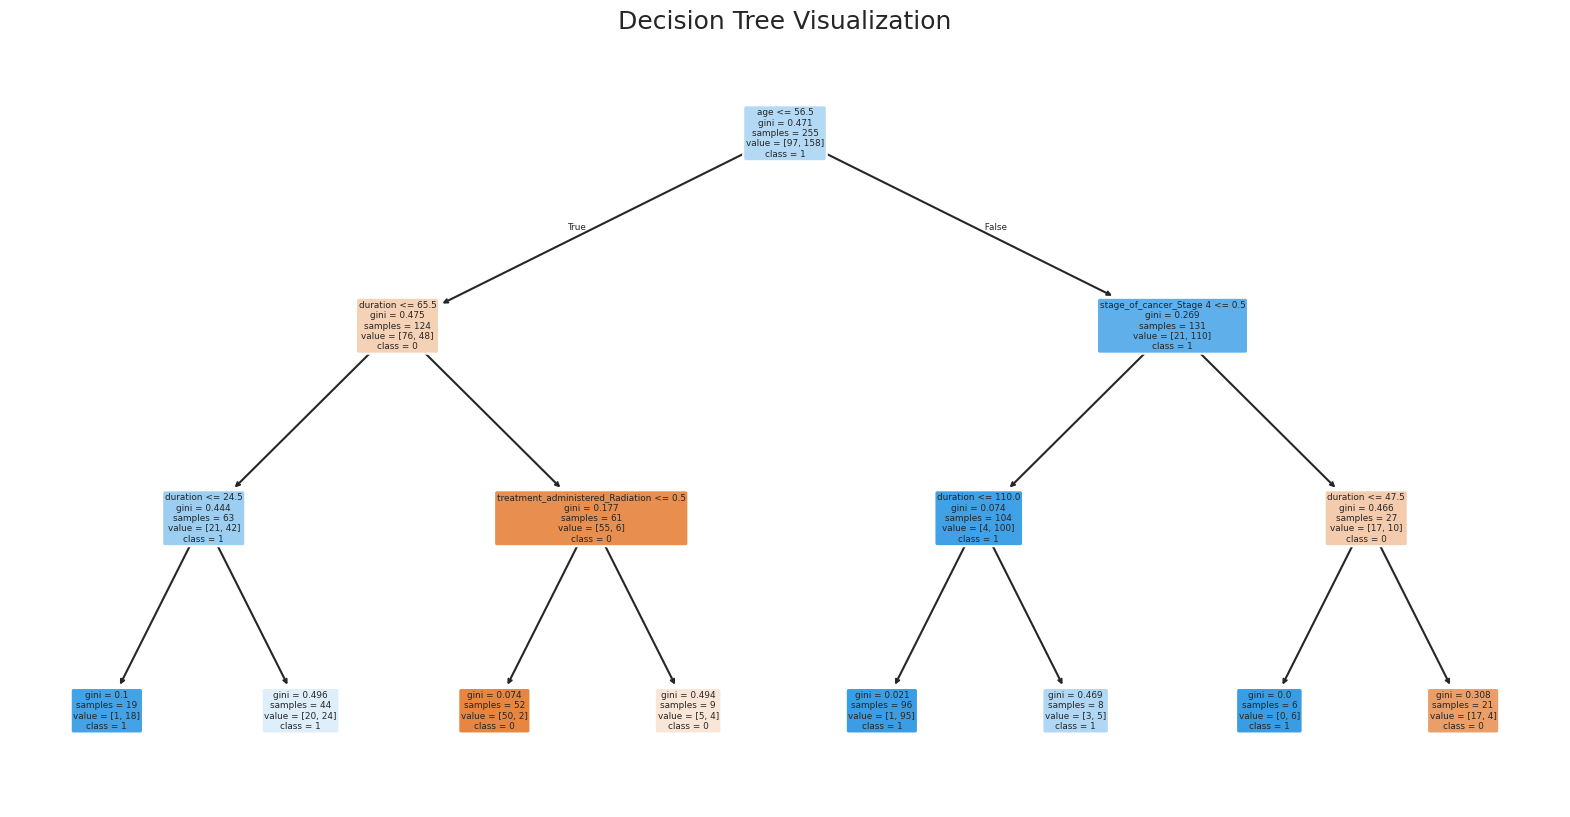

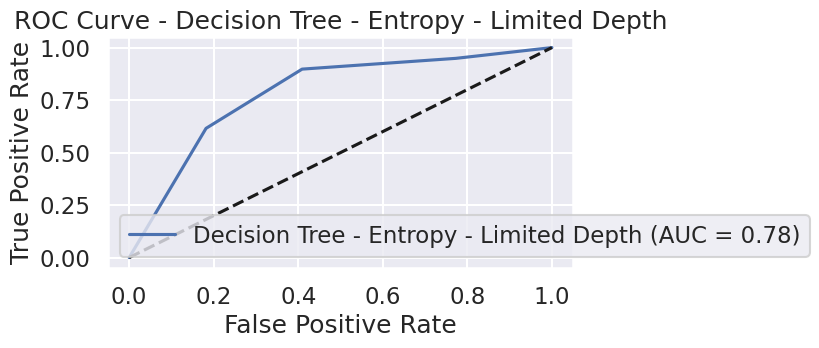

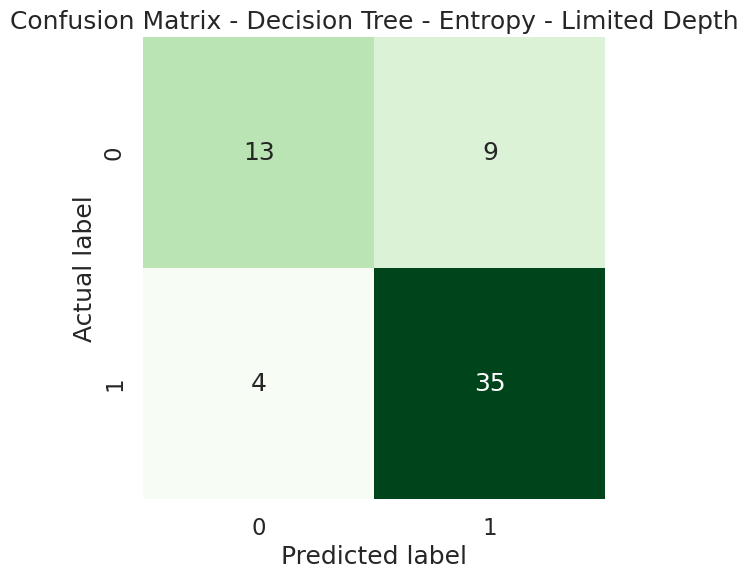

{'Accuracy': 0.7868852459016393,
 'ROC AUC': 0.784965034965035,
 'Sensitivity': 0.8974358974358975,
 'Specificity': 0.5909090909090909}

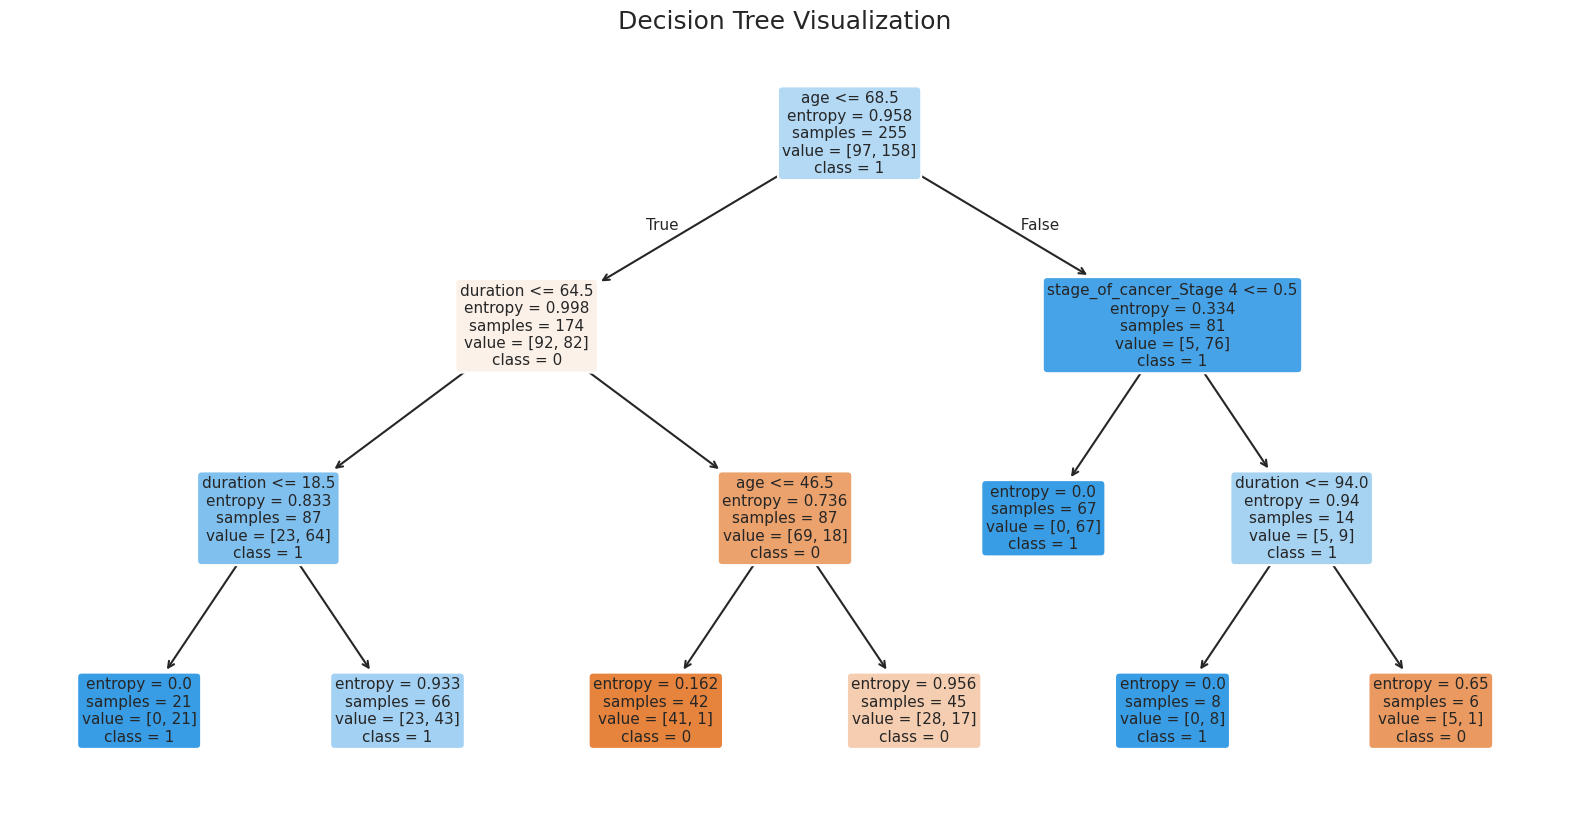

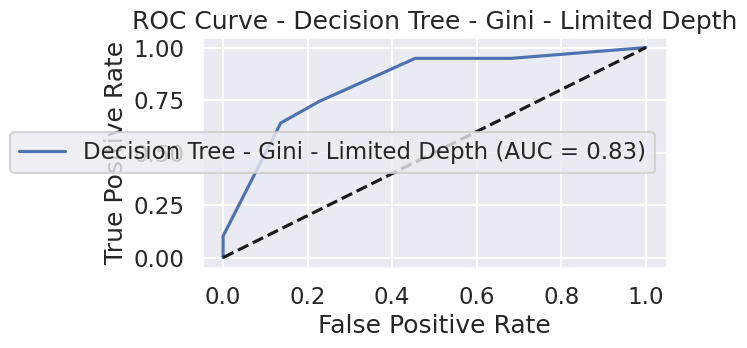

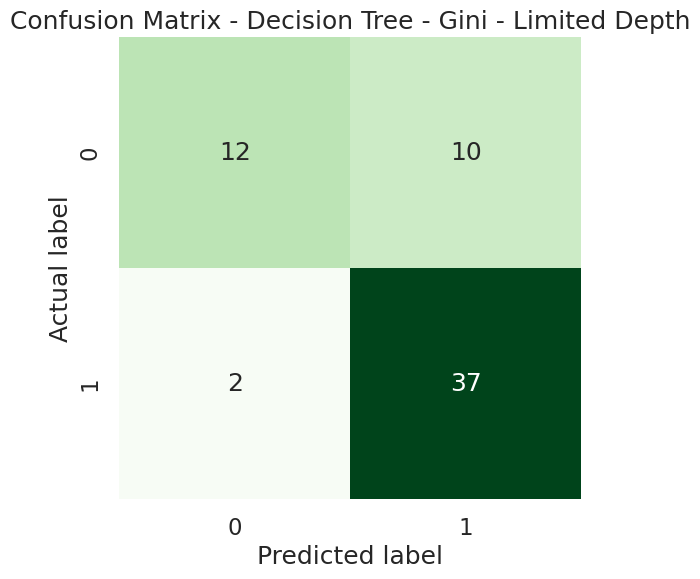

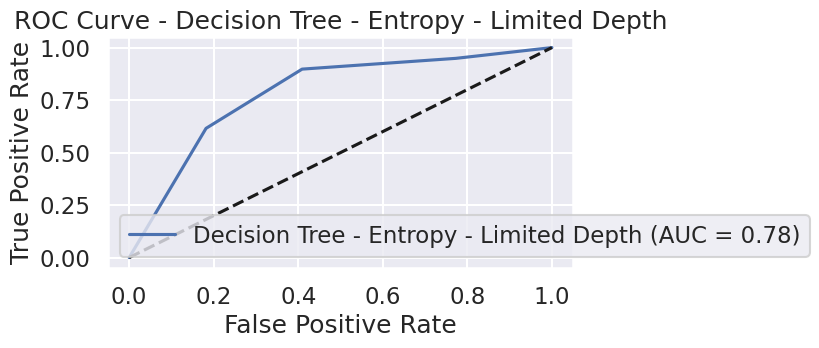

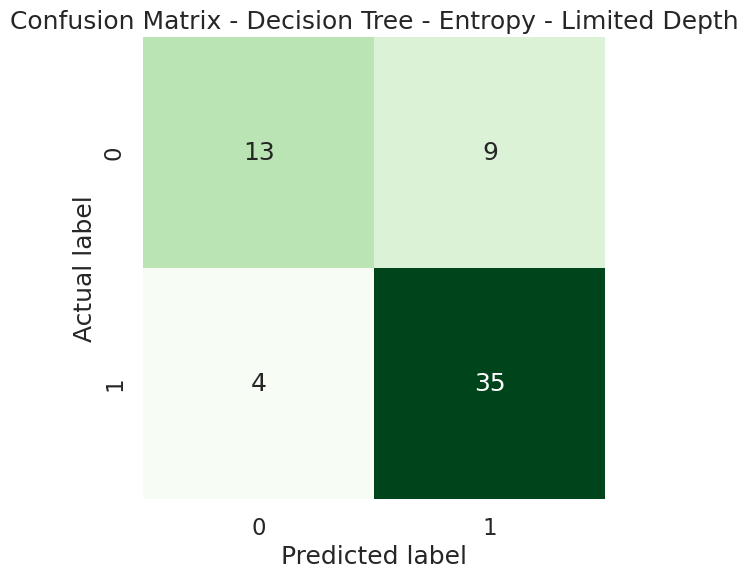

Accuracy   ROC AUC  Sensitivity  \
Logistic Regression                      0.952941  0.992431     0.962025   
Logistic Regression (CV)                 0.925490  0.981924     0.948538   
Logistic Regression (Test)               0.918033  0.970862     0.923077   
Decision Tree                            0.862745  0.943886     0.936709   
Decision Tree (CV)                       0.858824  0.924670     0.822785   
Decision Tree (Test)                     0.786885  0.828089     0.820513   
Decision Tree - Gini - Limited Depth     0.803279  0.831585     0.948718   
Decision Tree - Entropy - Limited Depth  0.786885  0.784965     0.897436   

                                         Specificity  
Logistic Regression                         0.938144  
Logistic Regression (CV)                    0.893864  
Logistic Regression (Test)                  0.909091  
Decision Tree                               0.742268  
Decision Tree (CV)                          0.917526  
Decision Tree (Test)                        0.727273  
Decision Tree - Gini - Limited Depth        0.545455  
Decision Tree - Entropy - Limited Depth     0.590909

In [31]:
dt_model_gini = train_decision_tree(X_train, y_train, criterion='gini', max_depth=3)
evaluate_decision_tree(dt_model_gini, X_test, y_test, 'Decision Tree - Gini - Limited Depth')
visualize_tree(dt_model_gini, X_train.columns)

dt_model_entropy = train_decision_tree(X_train, y_train, criterion='entropy', max_depth=3)
evaluate_decision_tree(dt_model_entropy, X_test, y_test, 'Decision Tree - Entropy - Limited Depth')
visualize_tree(dt_model_entropy, X_train.columns)

results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree': initial_train_results_dt,
    'Decision Tree (CV)': cv_train_results_dt,
    'Decision Tree (Test)': test_results_dt,
    'Decision Tree - Gini - Limited Depth': evaluate_decision_tree(dt_model_gini, X_test, y_test, 'Decision Tree - Gini - Limited Depth'),
    'Decision Tree - Entropy - Limited Depth': evaluate_decision_tree(dt_model_entropy, X_test, y_test, 'Decision Tree - Entropy - Limited Depth')
}).T
display(results_df)

# ANN (Artificial Neural Networks)
1.  Model Setup: We'll use MLPClassifier from sklearn, which is a feedforward neural network implementation.
2. Network Architecture: We'll start with a simple architecture (one hidden layer) and gradually increase complexity if needed.
3. Training and Evaluation: The process will be similar to what we've done for Logistic Regression and Decision Trees, using ROC AUC, Sensitivity, and Specificity for evaluation.

Train the Neural Network (ANN)

In [32]:
def train_neural_network(X_train, y_train, hidden_layer_sizes=(100,), activation='relu', max_iter=1000):
    ann_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, random_state=42, verbose=True)
    ann_model.fit(X_train, y_train)
    return ann_model

### Train ANN with K-Folds Cross-Validation

In [33]:
def train_neural_network_with_kfolds(X, y, n_splits=5, hidden_layer_sizes=(100,), activation='relu', max_iter=1000):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    models = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ann_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, random_state=42, verbose=True)
        ann_model.fit(X_train, y_train)

        models.append(ann_model)

    return models


Evaluate the Neural Network


In [34]:
def evaluate_neural_network(ann_model, X_train, y_train, model_name):
    y_pred = ann_model.predict(X_train)
    y_prob = ann_model.predict_proba(X_train)[:, 1]

    roc_auc = roc_auc_score(y_train, y_prob)

    fpr, tpr, _ = roc_curve(y_train, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Neural Network')
    plt.legend()
    plt.show()

    cm = confusion_matrix(y_train, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = accuracy_score(y_train, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title('Confusion Matrix - Neural Network')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return {'Accuracy': accuracy, 'ROC AUC': roc_auc, 'Sensitivity': sensitivity, 'Specificity': specificity}

Iteration 1, loss = 4.02230292
Iteration 2, loss = 2.10454022
Iteration 3, loss = 0.86947080
Iteration 4, loss = 0.63834363
Iteration 5, loss = 0.92990311
Iteration 6, loss = 1.12074851
Iteration 7, loss = 1.02213408
Iteration 8, loss = 0.80638496
Iteration 9, loss = 0.64397050
Iteration 10, loss = 0.61286203
Iteration 11, loss = 0.65718838
Iteration 12, loss = 0.70880343
Iteration 13, loss = 0.71580951
Iteration 14, loss = 0.67234684
Iteration 15, loss = 0.62725891
Iteration 16, loss = 0.58560556
Iteration 17, loss = 0.57560980
Iteration 18, loss = 0.57066244
Iteration 19, loss = 0.56298485
Iteration 20, loss = 0.54736251
Iteration 21, loss = 0.52878874
Iteration 22, loss = 0.51326551
Iteration 23, loss = 0.49312804
Iteration 24, loss = 0.48197188
Iteration 25, loss = 0.47281459
Iteration 26, loss = 0.46184911
Iteration 27, loss = 0.44970322
Iteration 28, loss = 0.43596365
Iteration 29, loss = 0.41821720
Iteration 30, loss = 0.40762723
Iteration 31, loss = 0.39689920
Iteration 32, los

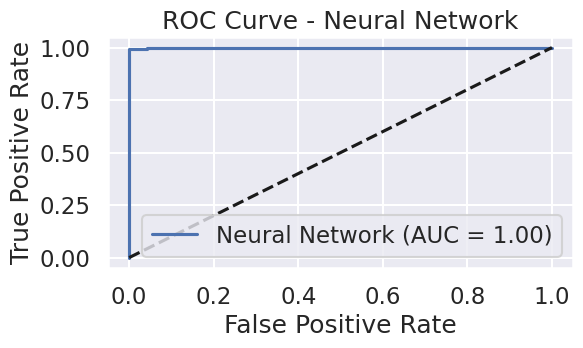

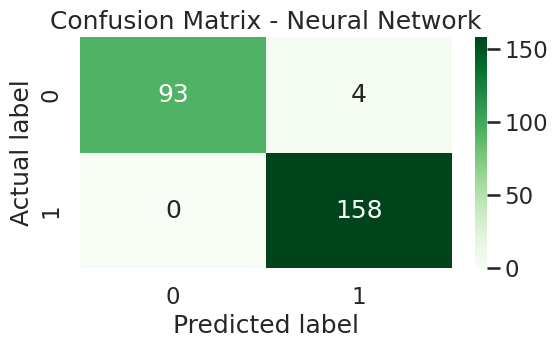

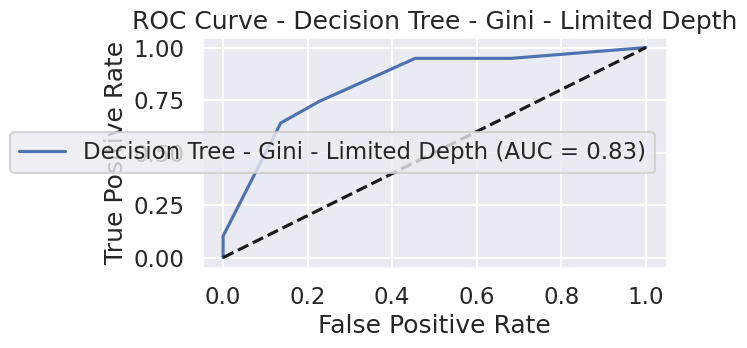

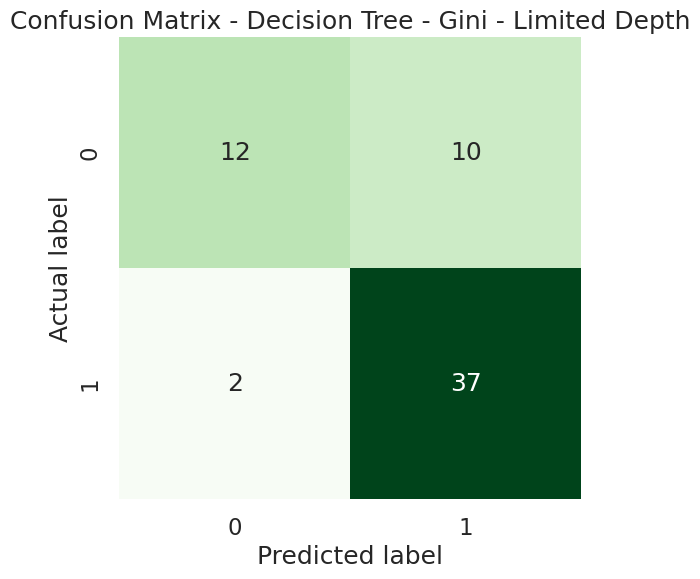

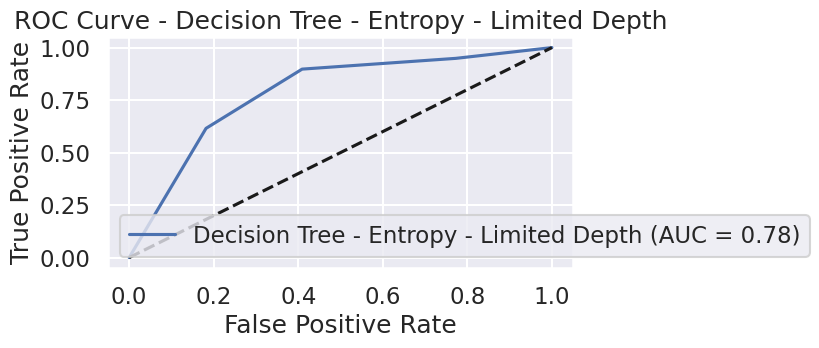

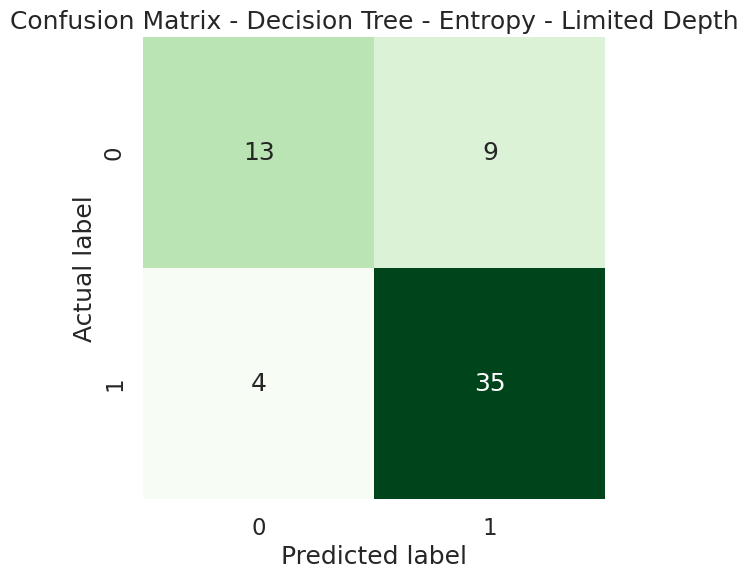

Accuracy   ROC AUC  Sensitivity  \
Logistic Regression                      0.952941  0.992431     0.962025   
Logistic Regression (CV)                 0.925490  0.981924     0.948538   
Logistic Regression (Test)               0.918033  0.970862     0.923077   
Decision Tree - Initial Train Set        0.862745  0.943886     0.936709   
Decision Tree - CV Train Set             0.858824  0.924670     0.822785   
Decision Tree - Test Set                 0.786885  0.828089     0.820513   
Decision Tree - Gini - Limited Depth     0.803279  0.831585     0.948718   
Decision Tree - Entropy - Limited Depth  0.786885  0.784965     0.897436   
ANN                                      0.984314  0.999739     1.000000   

                                         Specificity  
Logistic Regression                         0.938144  
Logistic Regression (CV)                    0.893864  
Logistic Regression (Test)                  0.909091  
Decision Tree - Initial Train Set           0.742268  
Decision Tree - CV Train Set                0.917526  
Decision Tree - Test Set                    0.727273  
Decision Tree - Gini - Limited Depth        0.545455  
Decision Tree - Entropy - Limited Depth     0.590909  
ANN                                         0.958763

In [35]:
ann_model = train_neural_network(X_train, y_train, hidden_layer_sizes=(100,), activation='relu', max_iter=1000)
initial_train_results_ann = evaluate_neural_network(ann_model, X_train, y_train, 'Artificial Neural Network')
results["ANN - Initial Train Set"] = initial_train_results_ann


results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree - Initial Train Set': initial_train_results_dt,
    'Decision Tree - CV Train Set': cv_train_results_dt,
    'Decision Tree - Test Set': test_results_dt,
    'Decision Tree - Gini - Limited Depth': evaluate_decision_tree(dt_model_gini, X_test, y_test, 'Decision Tree - Gini - Limited Depth'),
    'Decision Tree - Entropy - Limited Depth': evaluate_decision_tree(dt_model_entropy, X_test, y_test, 'Decision Tree - Entropy - Limited Depth'),
    'ANN': initial_train_results_ann
}).T
display(results_df)

Iteration 1, loss = 4.22163960
Iteration 2, loss = 2.23266392
Iteration 3, loss = 0.98520147
Iteration 4, loss = 0.54672483
Iteration 5, loss = 0.66943191
Iteration 6, loss = 0.93194218
Iteration 7, loss = 1.02349321
Iteration 8, loss = 0.96440416
Iteration 9, loss = 0.79275934
Iteration 10, loss = 0.62363374
Iteration 11, loss = 0.56077809
Iteration 12, loss = 0.57959426
Iteration 13, loss = 0.61640017
Iteration 14, loss = 0.64929655
Iteration 15, loss = 0.65909269
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.22354979
Iteration 2, loss = 2.25010972
Iteration 3, loss = 0.97161520
Iteration 4, loss = 0.58184682
Iteration 5, loss = 0.69279621
Iteration 6, loss = 0.80113225
Iteration 7, loss = 0.81207305
Iteration 8, loss = 0.73692669
Iteration 9, loss = 0.62985174
Iteration 10, loss = 0.58411131
Iteration 11, loss = 0.59810975
Iteration 12, loss = 0.62565651
Iteration 13, loss = 0.63808097
Iteration 14, loss = 0.62662879


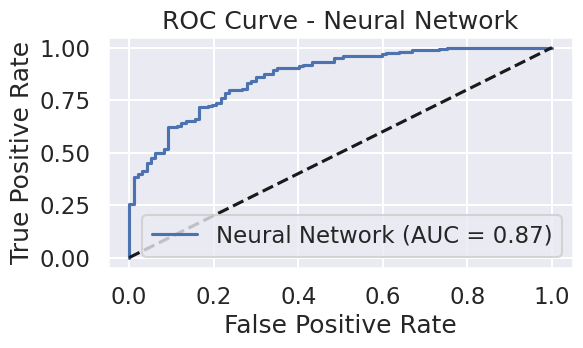

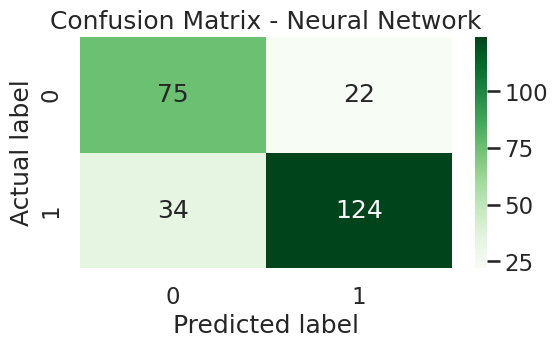

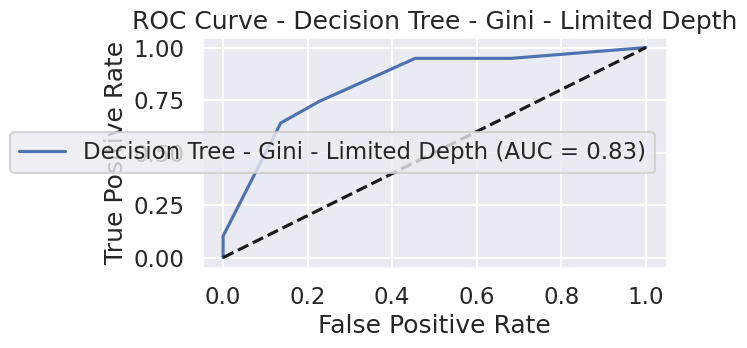

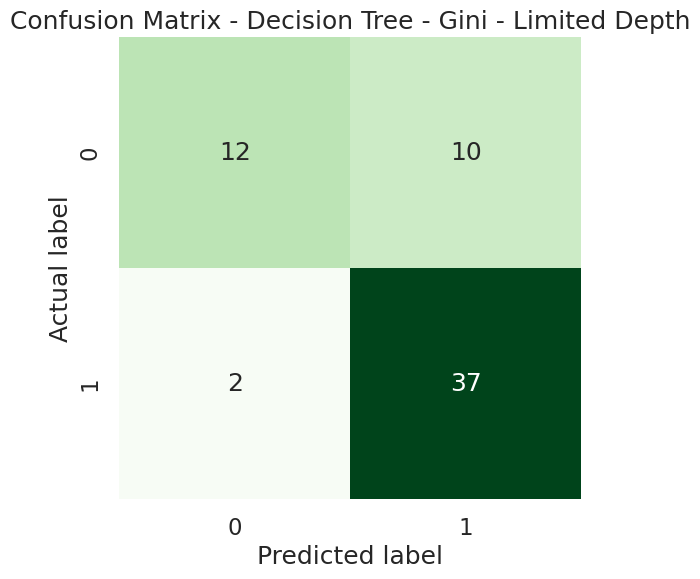

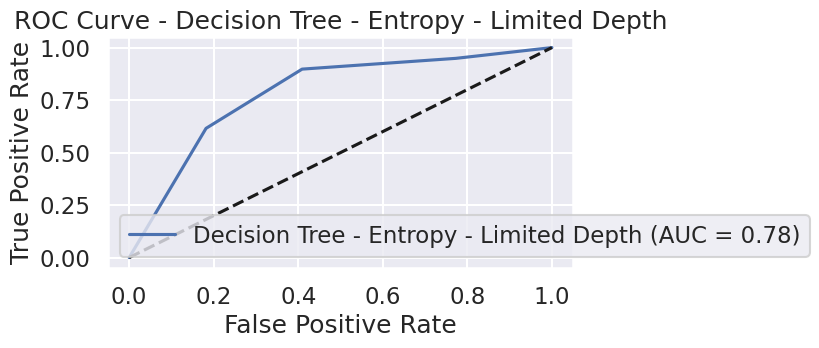

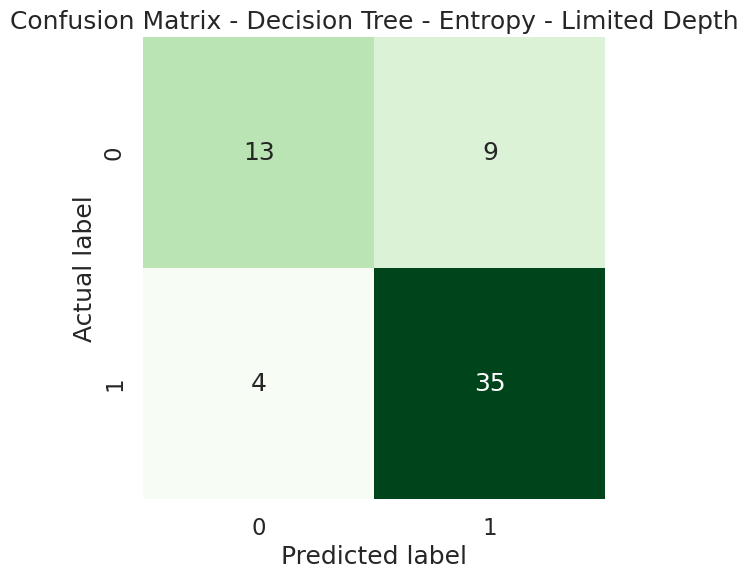

Accuracy   ROC AUC  Sensitivity  \
Logistic Regression                      0.952941  0.992431     0.962025   
Logistic Regression (CV)                 0.925490  0.981924     0.948538   
Logistic Regression (Test)               0.918033  0.970862     0.923077   
Decision Tree - Initial Train Set        0.862745  0.943886     0.936709   
Decision Tree - CV Train Set             0.858824  0.924670     0.822785   
Decision Tree - Test Set                 0.786885  0.828089     0.820513   
Decision Tree - Gini - Limited Depth     0.803279  0.831585     0.948718   
Decision Tree - Entropy - Limited Depth  0.786885  0.784965     0.897436   
ANN                                      0.984314  0.999739     1.000000   
Ann (CV)                                 0.780392  0.865718     0.784810   

                                         Specificity  
Logistic Regression                         0.938144  
Logistic Regression (CV)                    0.893864  
Logistic Regression (Test)                  0.909091  
Decision Tree - Initial Train Set           0.742268  
Decision Tree - CV Train Set                0.917526  
Decision Tree - Test Set                    0.727273  
Decision Tree - Gini - Limited Depth        0.545455  
Decision Tree - Entropy - Limited Depth     0.590909  
ANN                                         0.958763  
Ann (CV)                                    0.773196

In [36]:
models = train_neural_network_with_kfolds(X_train, y_train, hidden_layer_sizes=(100,), activation='relu', max_iter=1000)
cv_train_results_ann = evaluate_neural_network(models[-1], X_train, y_train, 'Artificial Neural Network')
results["ANN - CV Train Set"] = cv_train_results_ann


results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree - Initial Train Set': initial_train_results_dt,
    'Decision Tree - CV Train Set': cv_train_results_dt,
    'Decision Tree - Test Set': test_results_dt,
    'Decision Tree - Gini - Limited Depth': evaluate_decision_tree(dt_model_gini, X_test, y_test, 'Decision Tree - Gini - Limited Depth'),
    'Decision Tree - Entropy - Limited Depth': evaluate_decision_tree(dt_model_entropy, X_test, y_test, 'Decision Tree - Entropy - Limited Depth'),
    'ANN': initial_train_results_ann,
    'Ann (CV)': cv_train_results_ann
}).T
display(results_df)


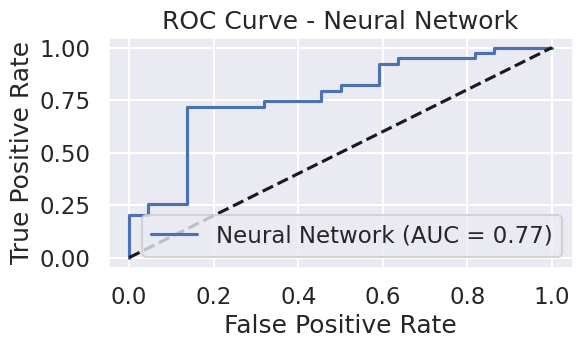

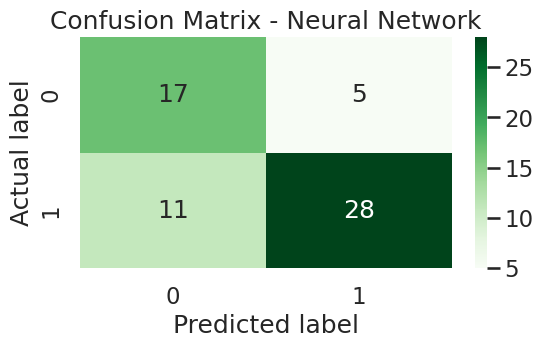

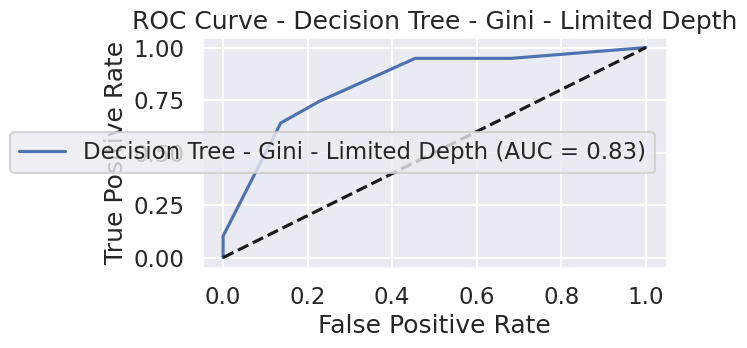

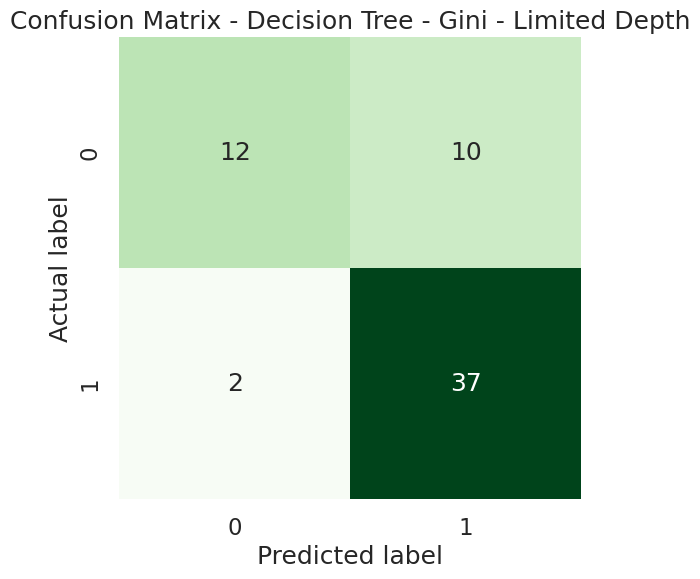

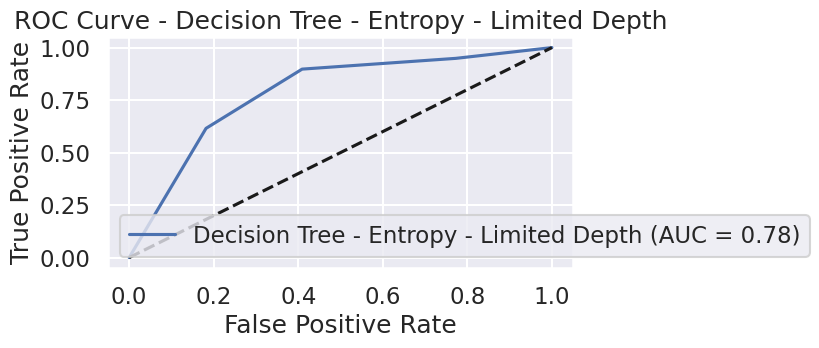

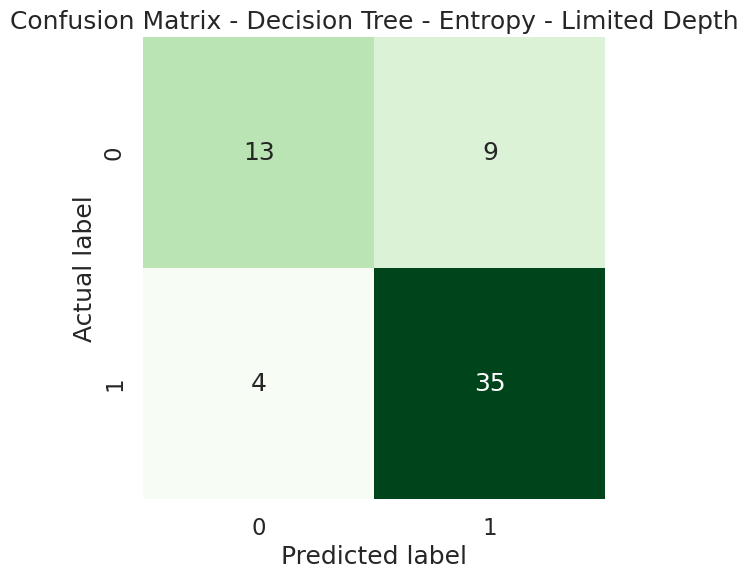

Accuracy   ROC AUC  Sensitivity  \
Logistic Regression                      0.952941  0.992431     0.962025   
Logistic Regression (CV)                 0.925490  0.981924     0.948538   
Logistic Regression (Test)               0.918033  0.970862     0.923077   
Decision Tree                            0.862745  0.943886     0.936709   
Decision Tree (CV)                       0.858824  0.924670     0.822785   
Decision Tree (Test)                     0.786885  0.828089     0.820513   
Decision Tree - Gini - Limited Depth     0.803279  0.831585     0.948718   
Decision Tree - Entropy - Limited Depth  0.786885  0.784965     0.897436   
ANN                                      0.984314  0.999739     1.000000   
ANN (CV)                                 0.780392  0.865718     0.784810   
ANN (Test)                               0.737705  0.770396     0.717949   

                                         Specificity  
Logistic Regression                         0.938144  
Logistic Regression (CV)                    0.893864  
Logistic Regression (Test)                  0.909091  
Decision Tree                               0.742268  
Decision Tree (CV)                          0.917526  
Decision Tree (Test)                        0.727273  
Decision Tree - Gini - Limited Depth        0.545455  
Decision Tree - Entropy - Limited Depth     0.590909  
ANN                                         0.958763  
ANN (CV)                                    0.773196  
ANN (Test)                                  0.772727

In [37]:
test_results_ann = evaluate_neural_network(models[-1], X_test, y_test, 'ANN - Test Set')
results["ANN - Test Set"] = test_results_ann


results_df = pd.DataFrame({
    'Logistic Regression': original_train_results,
    'Logistic Regression (CV)': cv_train_results,
    'Logistic Regression (Test)': test_results,
    'Decision Tree': initial_train_results_dt,
    'Decision Tree (CV)': cv_train_results_dt,
    'Decision Tree (Test)': test_results_dt,
    'Decision Tree - Gini - Limited Depth': evaluate_decision_tree(dt_model_gini, X_test, y_test, 'Decision Tree - Gini - Limited Depth'),
    'Decision Tree - Entropy - Limited Depth': evaluate_decision_tree(dt_model_entropy, X_test, y_test, 'Decision Tree - Entropy - Limited Depth'),
    'ANN': initial_train_results_ann,
    'ANN (CV)': cv_train_results_ann,
    'ANN (Test)': test_results_ann
}).T

display(results_df)

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Precision Score')

Text(0.5, 1.0, 'Comparison of Model Precision Scores')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Logistic Regression - CV'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Decision Tree - CV'),
  Text(4, 0, 'Decision Tree - Gini - Limited Depth'),
  Text(5, 0, 'Decision Tree - Entropy - Limited Depth'),
  Text(6, 0, 'Artificial Neural Network'),
  Text(7, 0, 'Artificial Neural Network - CV')])

<ipython-input-38-c9fb05c09afa>:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Precision Score')


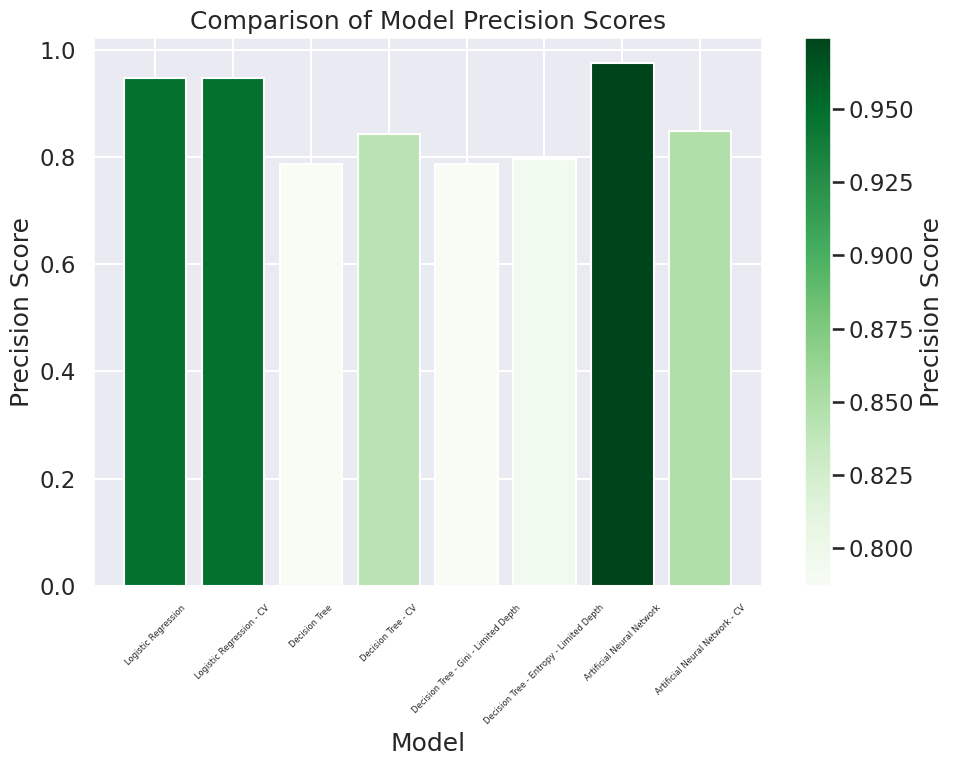

In [38]:
y_pred_lr = initial_lr_model.predict(X_test)
y_pred_lr_cv = cv_lr_model.predict(X_test)

y_pred_dt = dt_initial.predict(X_test)
y_pred_dt_cv = dt_cv.predict(X_test)

y_pred_dt_gini = dt_model_gini.predict(X_test)
y_pred_dt_entropy = dt_model_entropy.predict(X_test)

y_pred_ann = ann_model.predict(X_test)
y_pred_ann_cv = models[-1].predict(X_test)

precision_scores = {
    "Logistic Regression": precision_score(y_test, y_pred_lr),
    "Logistic Regression - CV": precision_score(y_test, y_pred_lr_cv),
    "Decision Tree": precision_score(y_test, y_pred_dt),
    "Decision Tree - CV": precision_score(y_test, y_pred_dt_cv),
    "Decision Tree - Gini - Limited Depth": precision_score(y_test, y_pred_dt_gini),
    "Decision Tree - Entropy - Limited Depth": precision_score(y_test, y_pred_dt_entropy),
    "Artificial Neural Network": precision_score(y_test, y_pred_ann),
    "Artificial Neural Network - CV": precision_score(y_test, y_pred_ann_cv)
}
model_names = list(precision_scores.keys())
precision_values = list(precision_scores.values())
norm = plt.Normalize(min(precision_values), max(precision_values))
colors = [plt.cm.Greens(norm(value)) for value in precision_values]
plt.figure(figsize=(10, 8))
bar = plt.bar(model_names, precision_values, color=colors)
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Comparison of Model Precision Scores')
plt.xticks(rotation=45, fontsize=6)
sm = cm.ScalarMappable(cmap=plt.cm.Greens, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Precision Score')
plt.tight_layout()
plt.show()

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
! pwd

/content


In [41]:
%%shell
jupyter nbconvert --to html //content/Breast_Cancer_Survival_Prediction_01.ipynb

[NbConvertApp] WARNING | pattern '//content/Breast_Cancer_Survival_Prediction_01.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyte

CalledProcessError: Command 'jupyter nbconvert --to html //content/Breast_Cancer_Survival_Prediction_01.ipynb
' returned non-zero exit status 255.